### Introduction
Notebook to check if there are correlations that can be drawn between ETFs that track various market indicies in the US with that of COVID-19 confirmed cases.

John Hopkins data will be used along with yfinance for closing prices.

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Aug 10 10:42:09 2018

@author: Bryan Tarras (modified), Rosario (original)
"""

import pandas as pd
import numpy as np
import math
pd.core.common.is_list_like = pd.api.types.is_list_like #datareader problem probably fixed in next version of datareader
from pandas_datareader import data as pdr
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
#import detrendPrice
#import WhiteRealityCheckFor1

import seaborn as sns

import yfinance as yf
#yf.pdr_override() # <== that's all it takes :-)

from datetime import datetime

In [3]:
stock_list = ['XLU','XLV','DIA','GDX','XLE','XLY','VNQ','XLK','XLF','XLP','FSTA','IHI','XRT','RXI','IYW','VIS','KBE','SIL','FNCL','XAR','FXU','SHY']

In [4]:

#Example1
# download dataframe
#data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")
# download Panel
#data2 = pdr.get_data_yahoo(["SPY", "IWM"], start="2017-01-01", end="2017-04-30")
#example2
#start = datetime.datetime(2017, 1, 1)
#symbol = 'SPY'
#data = pdr.get_data_yahoo(symbol, start=start, end=end)
#data.to_csv("C:\\Users\\Rosario\\Documents\\NeuralNetworksMachineLearning\\LSTMReturnPrediction\\data\\YahooSPY.csv")

#start_date=datetime.datetime(2003, 1, 1)
start_date_training=datetime(2020, 1, 16)
#end_date= datetime.datetime.now()
end_date_training=datetime(2020, 3, 17)

stock_str = ""
for i in range(len(stock_list)):
    stock_str  = stock_str + stock_list[i] + "."


#Below is for AP training data download    
main_df = pd.DataFrame()

for stock in range(len(stock_list)):
     df = pdr.get_data_yahoo(stock_list[stock], start=start_date_training, end=end_date_training)
     df.drop(['Close','High', 'Low' , 'Open', 'Volume'], axis=1, inplace=True)
     df.rename(columns={'Adj Close': stock_list[stock]}, inplace=True)
     if main_df.empty:
         main_df = df
     else:
        main_df = main_df.join(df) 
    

main_df.to_csv(stock_str+"AP_train.csv")


#Below is for normal prices training data download 
main_df = pd.DataFrame()

for stock in range(len(stock_list)):
     df = pdr.get_data_yahoo(stock_list[stock], start=start_date_training, end=end_date_training)
     df.drop(['Adj Close','High', 'Low' , 'Open', 'Volume'], axis=1, inplace=True)
     df.rename(columns={'Close': stock_list[stock]}, inplace=True)
     if main_df.empty:
         main_df = df
     else:
        main_df = main_df.join(df) 

main_df.to_csv(stock_str+"train.csv")

In [5]:
dfP = pd.read_csv('XLU.XLV.DIA.GDX.XLE.XLY.VNQ.XLK.XLF.XLP.FSTA.IHI.XRT.RXI.IYW.VIS.KBE.SIL.FNCL.XAR.FXU.SHY.train.csv', parse_dates=['Date'])
dfAP = pd.read_csv('XLU.XLV.DIA.GDX.XLE.XLY.VNQ.XLK.XLF.XLP.FSTA.IHI.XRT.RXI.IYW.VIS.KBE.SIL.FNCL.XAR.FXU.SHY.AP_train.csv', parse_dates=['Date'])

dfP = dfP.sort_values(by='Date')
dfAP = dfAP.sort_values(by='Date')
dfP.set_index('Date', inplace = True)
dfAP.set_index('Date', inplace = True)

In [7]:
dfP.tail()

XLU        XLV         DIA        GDX        XLE  \
Date                                                                 
2020-03-11  60.830002  91.620003  235.839996  25.170000  33.669998   
2020-03-12  54.689999  84.779999  212.110001  22.309999  29.469999   
2020-03-13  57.669998  90.660004  232.110001  19.000000  32.189999   
2020-03-16  51.119999  81.720001  202.490005  22.490000  27.809999   
2020-03-17  57.660000  86.849998  213.470001  25.500000  28.000000   

                   XLY        VNQ        XLK        XLF        XLP  ...  \
Date                                                                ...   
2020-03-11  107.169998  81.339996  83.500000  22.840000  57.580002  ...   
2020-03-12   96.339996  73.099998  75.349998  20.370001  52.169998  ...   
2020-03-13  102.300003  79.480003  84.190002  23.049999  56.610001  ...   
2020-03-16   89.339996  65.389999  72.559998  19.889999  52.770000  ...   
2020-03-17   92.779999  69.169998  77.500000  20.969999  57.220001  ...   

                  XRT         RXI         IYW         VIS        KBE  \
Date                                                                   
2020-03-11  34.970001  103.480003  209.830002  121.760002  30.709999   
2020-03-12  30.660000   92.510002  189.020004  109.150002  27.990000   
2020-03-13  32.740002   97.500000  210.369995  117.440002  31.230000   
2020-03-16  28.660000   85.610001  181.710007  103.980003  27.200001   
2020-03-17  30.139999   88.559998  194.130005  107.949997  28.730000   

                  SIL       FNCL        XAR        FXU        SHY  
Date                                                               
2020-03-11  25.620001  32.759998  85.489998  26.740000  86.190002  
2020-03-12  22.450001  29.200001  75.599998  24.110001  86.169998  
2020-03-13  18.610001  32.830002  80.629997  25.530001  86.279999  
2020-03-16  21.030001  28.490000  69.900002  22.830000  86.419998  
2020-03-17  23.330000  29.780001  73.489998  25.190001  86.220001  

[5 rows x 22 columns]

In [8]:
COVID_19_C = pd.read_csv('time_series_19-covid-Confirmed.csv')
COVID_19_D = pd.read_csv('time_series_19-covid-Deaths.csv')
COVID_19_R = pd.read_csv('time_series_19-covid-Recovered.csv')

In [9]:
COVID_19_C = COVID_19_C.drop(labels=None, axis=1, columns=('Province/State'))
COVID_19_C = COVID_19_C.drop(labels=None, axis=1, columns=('Lat'))
COVID_19_C = COVID_19_C.drop(labels=None, axis=1, columns=('Long'))
COVID_19_D = COVID_19_D.drop(labels=None, axis=1, columns=('Province/State'))
COVID_19_D = COVID_19_D.drop(labels=None, axis=1, columns=('Lat'))
COVID_19_D = COVID_19_D.drop(labels=None, axis=1, columns=('Long'))
COVID_19_R = COVID_19_R.drop(labels=None, axis=1, columns=('Province/State'))
COVID_19_R = COVID_19_R.drop(labels=None, axis=1, columns=('Lat'))
COVID_19_R = COVID_19_R.drop(labels=None, axis=1, columns=('Long'))

In [10]:
COVID_19_C = COVID_19_C.sort_values(by='Country/Region')
COVID_19_D = COVID_19_D.sort_values(by='Country/Region')
COVID_19_R = COVID_19_R.sort_values(by='Country/Region')

In [11]:
COVID_19_C.head()

Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
26           Afghanistan        0        0        0        0        0   
95               Albania        0        0        0        0        0   
29               Algeria        0        0        0        0        0   
60               Andorra        0        0        0        0        0   
414  Antigua and Barbuda        0        0        0        0        0   

     1/27/20  1/28/20  1/29/20  1/30/20  ...  3/8/20  3/9/20  3/10/20  \
26         0        0        0        0  ...       4       4        5   
95         0        0        0        0  ...       0       2       10   
29         0        0        0        0  ...      19      20       20   
60         0        0        0        0  ...       1       1        1   
414        0        0        0        0  ...       0       0        0   

     3/11/20  3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  
26         7        7        7       11       16       21       22  
95        12       23       33       38       42       51       55  
29        20       24       26       37       48       54       60  
60         1        1        1        1        1        2       39  
414        0        0        1        1        1        1        1  

[5 rows x 57 columns]

In [12]:
COVID_19_C = COVID_19_C.T
COVID_19_D = COVID_19_D.T
COVID_19_R = COVID_19_R.T

COVID_19_C.columns = COVID_19_C.iloc[0]
COVID_19_D.columns = COVID_19_D.iloc[0]
COVID_19_R.columns = COVID_19_R.iloc[0]

COVID_19_C = COVID_19_C.drop([COVID_19_C.index[0]])
COVID_19_D = COVID_19_D.drop([COVID_19_D.index[0]])
COVID_19_R = COVID_19_R.drop([COVID_19_R.index[0]])

In [13]:
COVID_19_D.tail()

Country/Region Afghanistan Albania Algeria Andorra Antigua and Barbuda  \
3/13/20                  0       1       2       0                   0   
3/14/20                  0       1       3       0                   0   
3/15/20                  0       1       4       0                   0   
3/16/20                  0       1       4       0                   0   
3/17/20                  0       1       4       0                   0   

Country/Region Argentina Armenia Aruba Australia Australia  ... Ukraine  \
3/13/20                2       0     0         0         0  ...       1   
3/14/20                2       0     0         0         0  ...       1   
3/15/20                2       0     0         0         0  ...       1   
3/16/20                2       0     0         0         0  ...       1   
3/17/20                2       0     0         0         0  ...       2   

Country/Region United Arab Emirates United Kingdom United Kingdom  \
3/13/20                           0              0              0   
3/14/20                           0              0              0   
3/15/20                           0              0              0   
3/16/20                           0              0              0   
3/17/20                           0              0              0   

Country/Region United Kingdom United Kingdom Uruguay Uzbekistan Venezuela  \
3/13/20                     0              8       0          0         0   
3/14/20                     0             21       0          0         0   
3/15/20                     0             21       0          0         0   
3/16/20                     1             55       0          0         0   
3/17/20                     1             55       0          0         0   

Country/Region Vietnam  
3/13/20              0  
3/14/20              0  
3/15/20              0  
3/16/20              0  
3/17/20              0  

[5 rows x 460 columns]

### This code below is Breaking my columns
I need to change the columns to become first row

In [14]:
#COVID_19_C.columns = [list(range(len(COVID_19_C.columns))), COVID_19_C.columns]
#COVID_19_D.columns = [list(range(len(COVID_19_D.columns))), COVID_19_D.columns]
#COVID_19_R.columns = [list(range(len(COVID_19_R.columns))), COVID_19_R.columns]

In [15]:
COVID_19_C_2 = pd.DataFrame(np.vstack([COVID_19_C.columns, COVID_19_C]))
COVID_19_D_2 = pd.DataFrame(np.vstack([COVID_19_D.columns, COVID_19_D]))
COVID_19_R_2 = pd.DataFrame(np.vstack([COVID_19_R.columns, COVID_19_R]))

In [16]:
COVID_19_D_2.head()

0        1        2        3                    4          5    \
0  Afghanistan  Albania  Algeria  Andorra  Antigua and Barbuda  Argentina   
1            0        0        0        0                    0          0   
2            0        0        0        0                    0          0   
3            0        0        0        0                    0          0   
4            0        0        0        0                    0          0   

       6      7          8          9    ...      450                   451  \
0  Armenia  Aruba  Australia  Australia  ...  Ukraine  United Arab Emirates   
1        0      0          0          0  ...        0                     0   
2        0      0          0          0  ...        0                     0   
3        0      0          0          0  ...        0                     0   
4        0      0          0          0  ...        0                     0   

              452             453             454             455      456  \
0  United Kingdom  United Kingdom  United Kingdom  United Kingdom  Uruguay   
1               0               0               0               0        0   
2               0               0               0               0        0   
3               0               0               0               0        0   
4               0               0               0               0        0   

          457        458      459  
0  Uzbekistan  Venezuela  Vietnam  
1           0          0        0  
2           0          0        0  
3           0          0        0  
4           0          0        0  

[5 rows x 460 columns]

Need to sum columns of the same country in the dataframes above.

Follow this link: https://stackoverflow.com/questions/25748683/pandas-sum-dataframe-rows-for-given-columns

In [17]:
#COVID_19_C summing columns with duplicate names
x = 1
for x in range (len(COVID_19_C_2.columns)):
    y = x - 1
    if COVID_19_C_2.iloc[0,x] == COVID_19_C_2.iloc[0,y]:
        #Do something to sum the columns past row 0
        #Hold the column and then delete after
        col_list = [x, y]
        COVID_19_C_2.iloc[1:,x] = COVID_19_C_2.iloc[1:,x] + COVID_19_C_2.iloc[1:,y]
        
#COVID_19_D summing columns with duplicate names
x = 1
for x in range (len(COVID_19_D_2.columns)):
    y = x - 1
    if COVID_19_D_2.iloc[0,x] == COVID_19_D_2.iloc[0,y]:
        #Do something to sum the columns past row 0
        #Hold the column and then delete after
        col_list_2 = [x, y]
        COVID_19_D_2.iloc[1:,x] = COVID_19_D_2.iloc[1:,x] + COVID_19_D_2.iloc[1:,y]
        
#COVID_19_R summing columns with duplicate names
x = 1
for x in range (len(COVID_19_R_2.columns)):
    y = x - 1
    if COVID_19_R_2.iloc[0,x] == COVID_19_R_2.iloc[0,y]:
        #Do something to sum the columns past row 0
        #Hold the column and then delete after
        col_list = [x, y]
        COVID_19_R_2.iloc[1:,x] = COVID_19_R_2.iloc[1:,x] + COVID_19_R_2.iloc[1:,y]

In [18]:
COVID_19_D_2.tail()

0   1   2   3   4   5   6   7   8   9    ... 450 451 452 453 454 455 456  \
52   0   1   2   0   0   2   0   0   0   0  ...   1   0   0   0   0   8   0   
53   0   1   3   0   0   2   0   0   0   0  ...   1   0   0   0   0  21   0   
54   0   1   4   0   0   2   0   0   0   0  ...   1   0   0   0   0  21   0   
55   0   1   4   0   0   2   0   0   0   0  ...   1   0   0   0   1  56   0   
56   0   1   4   0   0   2   0   0   0   0  ...   2   0   0   0   1  56   0   

   457 458 459  
52   0   0   0  
53   0   0   0  
54   0   0   0  
55   0   0   0  
56   0   0   0  

[5 rows x 460 columns]

In [19]:
#COVID_19_C Removing Duplicate Columns
x = 1
for x in range (len(COVID_19_C_2.columns)):
    y = x - 1
    if COVID_19_C_2.iloc[0,x] == COVID_19_C_2.iloc[0,y]:
        #Do something to sum the columns past row 0
        #Hold the column and then delete after
        COVID_19_C_2.iloc[0,y] = 'Delete'

COVID_19_C_2.columns = COVID_19_C_2.iloc[0]
COVID_19_C_2 = COVID_19_C_2.drop(labels=None, axis=1, columns=('Delete'))
    
#COVID_19_D Removing Duplicate Columns
x = 1
for x in range (len(COVID_19_D_2.columns)):
    y = x - 1
    if COVID_19_D_2.iloc[0,x] == COVID_19_D_2.iloc[0,y]:
        #Do something to sum the columns past row 0
        #Hold the column and then delete after
        COVID_19_D_2.iloc[0,y] = 'Delete'
        
COVID_19_D_2.columns = COVID_19_D_2.iloc[0]
COVID_19_D_2 = COVID_19_D_2.drop(labels=None, axis=1, columns=('Delete'))        

#COVID_19_R Removing Duplicate Columns
x = 1
for x in range (len(COVID_19_R_2.columns)):
    y = x - 1
    if COVID_19_R_2.iloc[0,x] == COVID_19_R_2.iloc[0,y]:
        #Do something to sum the columns past row 0
        #Hold the column and then delete after
        COVID_19_R_2.iloc[0,y] = 'Delete'

COVID_19_R_2.columns = COVID_19_R_2.iloc[0]
COVID_19_R_2 = COVID_19_R_2.drop(labels=None, axis=1, columns=('Delete'))

Reset index to equal index of orginal dataframe.

In [20]:
COVID_19_C_2 = COVID_19_C_2.iloc[1:]
COVID_19_C_2 = COVID_19_C_2.reset_index()
COVID_19_C = COVID_19_C.reset_index()
COVID_19_C_2['index'] = COVID_19_C['index']
COVID_19_C_2.set_index('index', inplace=True)

COVID_19_D_2 = COVID_19_D_2.iloc[1:]
COVID_19_D_2 = COVID_19_D_2.reset_index()
COVID_19_D = COVID_19_D.reset_index()
COVID_19_D_2['index'] = COVID_19_D['index']
COVID_19_D_2.set_index('index', inplace=True)

COVID_19_R_2 = COVID_19_R_2.iloc[1:]
COVID_19_R_2 = COVID_19_R_2.reset_index()
COVID_19_R = COVID_19_R.reset_index()
COVID_19_R_2['index'] = COVID_19_R['index']
COVID_19_R_2.set_index('index', inplace=True)

Next we need to take the rows and calculate the difference between them to get the number per day not the rolling cumulative.

After that we need to drop the days that aren't trading days...

In [21]:
print (COVID_19_D_2['Canada'])

index
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
1/27/20    0
1/28/20    0
1/29/20    0
1/30/20    0
1/31/20    0
2/1/20     0
2/2/20     0
2/3/20     0
2/4/20     0
2/5/20     0
2/6/20     0
2/7/20     0
2/8/20     0
2/9/20     0
2/10/20    0
2/11/20    0
2/12/20    0
2/13/20    0
2/14/20    0
2/15/20    0
2/16/20    0
2/17/20    0
2/18/20    0
2/19/20    0
2/20/20    0
2/21/20    0
2/22/20    0
2/23/20    0
2/24/20    0
2/25/20    0
2/26/20    0
2/27/20    0
2/28/20    0
2/29/20    0
3/1/20     0
3/2/20     0
3/3/20     0
3/4/20     0
3/5/20     0
3/6/20     0
3/7/20     0
3/8/20     0
3/9/20     1
3/10/20    1
3/11/20    1
3/12/20    1
3/13/20    1
3/14/20    1
3/15/20    1
3/16/20    4
3/17/20    5
Name: Canada, dtype: object


In [22]:
type(COVID_19_C_2)

pandas.core.frame.DataFrame

# Fixing Dates

In [23]:
#Fixing Dates for COVID_19_C_2
COVID_19_C_2 = COVID_19_C_2.reset_index()

for x in range (len(COVID_19_C_2)):
    COVID_19_C_2.iloc[x,0] = datetime.strptime(COVID_19_C_2.iloc[x,0], '%m/%d/%y')

COVID_19_C_2 = COVID_19_C_2.set_index('index')

#Fixing Dates for COVID_19_D_2
COVID_19_D_2 = COVID_19_D_2.reset_index()

for x in range (len(COVID_19_D_2)):
    COVID_19_D_2.iloc[x,0] = datetime.strptime(COVID_19_D_2.iloc[x,0], '%m/%d/%y')

COVID_19_D_2 = COVID_19_D_2.set_index('index')

#Fixing Dates for COVID_19_R_2
COVID_19_R_2 = COVID_19_R_2.reset_index()

for x in range (len(COVID_19_R_2)):
    COVID_19_R_2.iloc[x,0] = datetime.strptime(COVID_19_R_2.iloc[x,0], '%m/%d/%y')

COVID_19_R_2 = COVID_19_R_2.set_index('index')

In [24]:
#Start with resetting index
COVID_19_C_2 = COVID_19_C_2.reset_index()
COVID_19_D_2 = COVID_19_D_2.reset_index()
COVID_19_R_2 = COVID_19_R_2.reset_index()
dfP = dfP.reset_index()
dfAP = dfAP.reset_index()

In [25]:
#THIS ISNT WORKING
#FOR SOME REASON BOTH D AND R ARE BEING SET TO C VALUES

#For COVID_19_C
for x in range (len(COVID_19_C_2)):
    check = 0
    for y in range (len(dfP)):
        if (COVID_19_C_2.iloc[x,0] == dfP.iloc[y,0]):
            check = 1
    if check != 1:
            COVID_19_C_2.iloc[x,0] = 'Delete'

COVID_19_C_2 = COVID_19_C_2[COVID_19_C_2['index'] != 'Delete']
COVID_19_C_2 = COVID_19_C_2.set_index('index')

#For COVID_19_D
for x in range (len(COVID_19_D_2)):
    check = 0
    for y in range (len(dfP)):
        if (COVID_19_D_2.iloc[x,0] == dfP.iloc[y,0]):
            check = 1
    if check != 1:
            COVID_19_D_2.iloc[x,0] = 'Delete'

COVID_19_D_2 = COVID_19_D_2[COVID_19_D_2['index'] != 'Delete']
COVID_19_D_2 = COVID_19_D_2.set_index('index')

#For COVID_19_R
for x in range (len(COVID_19_R_2)):
    check = 0
    for y in range (len(dfP)):
        if (COVID_19_R_2.iloc[x,0] == dfP.iloc[y,0]):
            check = 1
    if check != 1:
            COVID_19_R_2.iloc[x,0] = 'Delete'

In [26]:
COVID_19_R_2 = COVID_19_R_2[COVID_19_R_2['index'] != 'Delete']
COVID_19_R_2 = COVID_19_R_2.set_index('index')

dfP = dfP.set_index('Date')
dfAP = dfAP.set_index('Date')

In [27]:
COVID_19_C_2.Canada

index
2020-01-22      0
2020-01-23      0
2020-01-24      0
2020-01-27      1
2020-01-28      2
2020-01-29      2
2020-01-30      2
2020-01-31      4
2020-02-03      4
2020-02-04      4
2020-02-05      5
2020-02-06      5
2020-02-07      7
2020-02-10      7
2020-02-11      7
2020-02-12      7
2020-02-13      7
2020-02-14      7
2020-02-18      8
2020-02-19      8
2020-02-20      8
2020-02-21      9
2020-02-24     10
2020-02-25     11
2020-02-26     11
2020-02-27     13
2020-02-28     14
2020-03-02     27
2020-03-03     30
2020-03-04     33
2020-03-05     37
2020-03-06     49
2020-03-09     77
2020-03-10     79
2020-03-11    108
2020-03-12    117
2020-03-13    193
2020-03-16    415
2020-03-17    478
Name: Canada, dtype: object

Everything is good except we need to subtract the rows from each other to get absolute each day not cumulative across the days

### Lets do Some Plotting of Confirmed Cases

In [28]:
print ('Confirmed Cases Less than 5')
for x in (COVID_19_C_2.columns):
    if COVID_19_C_2[x].iloc[-1] < 5:
        print (x, '=', COVID_19_C_2[x].iloc[-1])

print ('\n')      

print ('Confirmed Cases Greater Than 5 and Less than 100')
for x in (COVID_19_C_2.columns):
    if COVID_19_C_2[x].iloc[-1] > 5 and COVID_19_C_2[x].iloc[-1] < 100:
        print (x, '=', COVID_19_C_2[x].iloc[-1])

print ('\n')             
        
print ('Confirmed Cases Greater Than 100 and Less than 1000')
for x in (COVID_19_C_2.columns):
    if COVID_19_C_2[x].iloc[-1] > 100 and COVID_19_C_2[x].iloc[-1] < 10000:
        print (x, '=', COVID_19_C_2[x].iloc[-1])

print ('\n')        

print ('Confirmed Cases Greater Than 1,000 and Less than 10,000')
for x in (COVID_19_C_2.columns):
    if COVID_19_C_2[x].iloc[-1] > 1000 and COVID_19_C_2[x].iloc[-1] < 10000:
        print (x, '=', COVID_19_C_2[x].iloc[-1])
        
print ('\n')        

print ('Confirmed Cases Greater Than 10,000')
for x in (COVID_19_C_2.columns):
    if COVID_19_C_2[x].iloc[-1] > 10000:
        print (x, '=', COVID_19_C_2[x].iloc[-1])

Confirmed Cases Less than 5
Antigua and Barbuda = 1
Aruba = 3
Barbados = 2
Benin = 1
Bhutan = 1
Central African Republic = 1
Congo (Brazzaville) = 1
Congo (Kinshasa) = 3
Equatorial Guinea = 1
Eswatini = 1
Gabon = 1
Greenland = 1
Guernsey = 1
Guinea = 1
Holy See = 1
Jersey = 2
Kenya = 3
Kosovo = 2
Liberia = 1
Mauritania = 1
Montenegro = 2
Namibia = 2
Nepal = 1
Nigeria = 3
Republic of the Congo = 1
Saint Lucia = 2
Saint Vincent and the Grenadines = 1
Seychelles = 4
Somalia = 1
Sudan = 1
Suriname = 1
Tanzania = 1
The Bahamas = 1
The Gambia = 1
Togo = 1


Confirmed Cases Greater Than 5 and Less than 100
Afghanistan = 22
Albania = 55
Algeria = 60
Andorra = 39
Argentina = 68
Armenia = 78
Azerbaijan = 28
Bangladesh = 10
Belarus = 36
Bolivia = 11
Bosnia and Herzegovina = 26
Brunei = 56
Bulgaria = 67
Burkina Faso = 15
Cambodia = 33
Cameroon = 10
Colombia = 65
Costa Rica = 41
Croatia = 65
Cyprus = 46
Dominican Republic = 21
Ecuador = 58
Georgia = 34
Ghana = 7
Guatemala = 6
Guyana = 7
Honduras = 

C:\Users\BryanT\AppData\Local\conda\conda\envs\py35\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


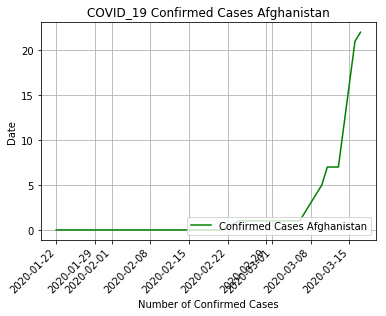

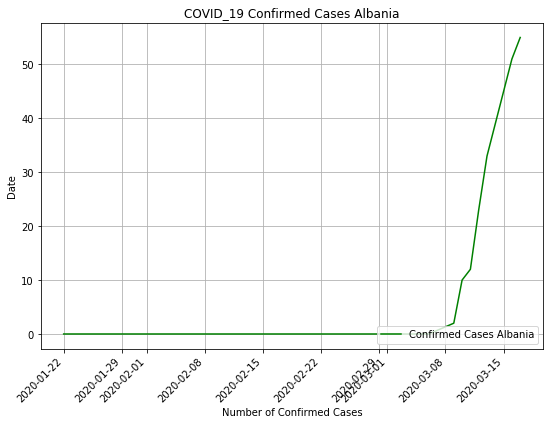

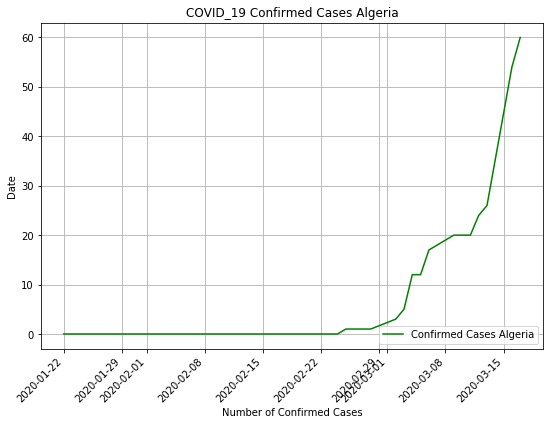

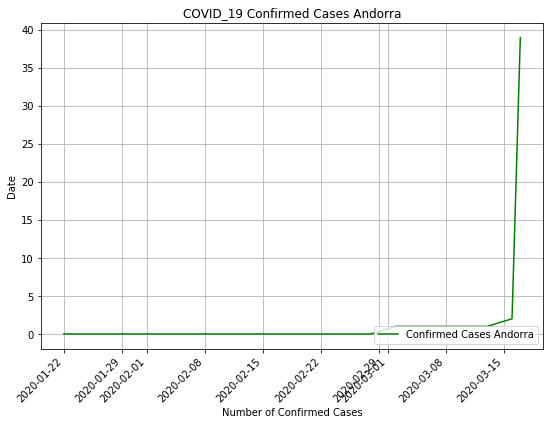

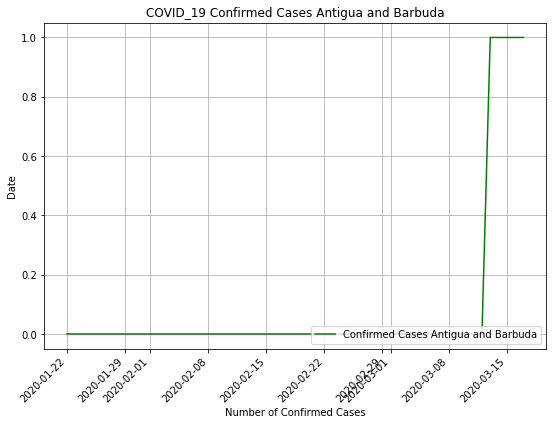

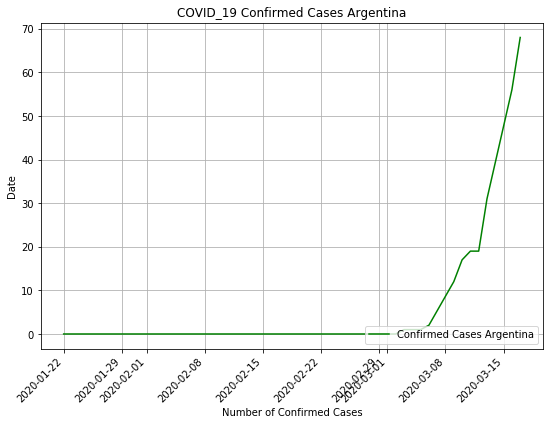

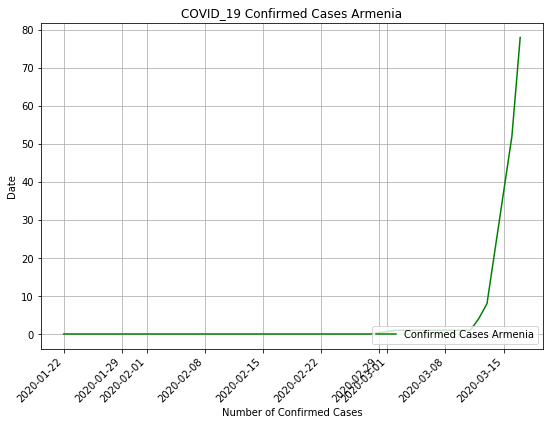

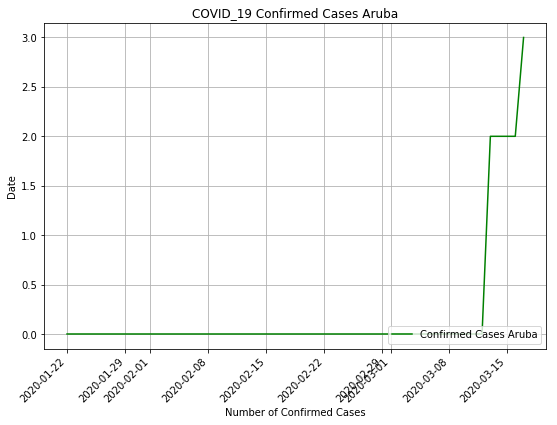

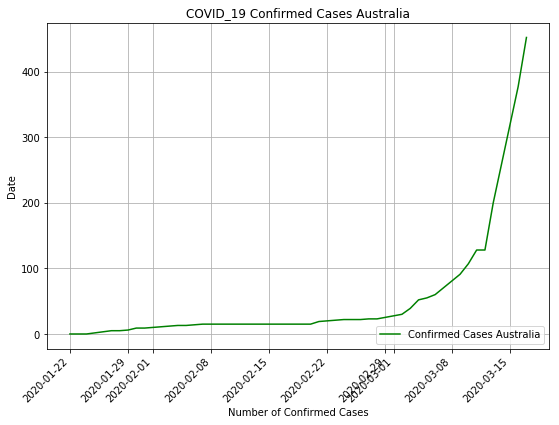

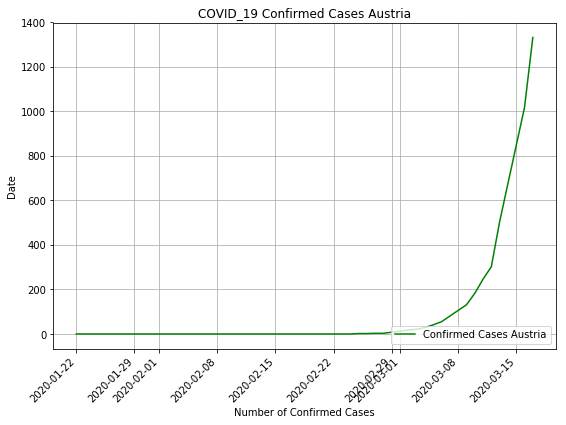

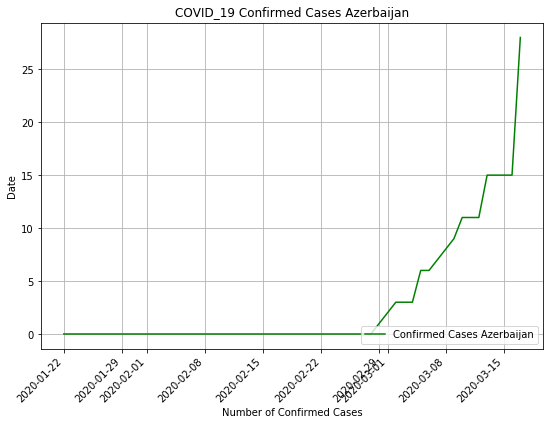

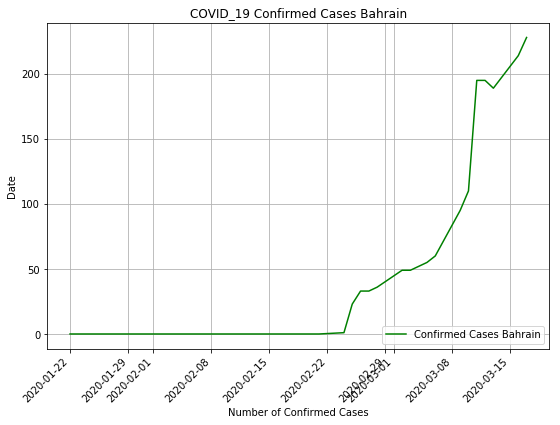

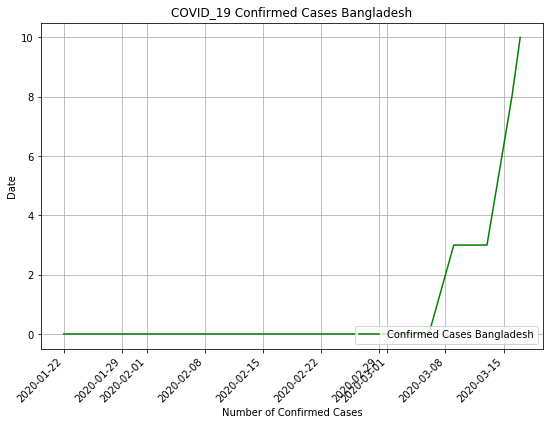

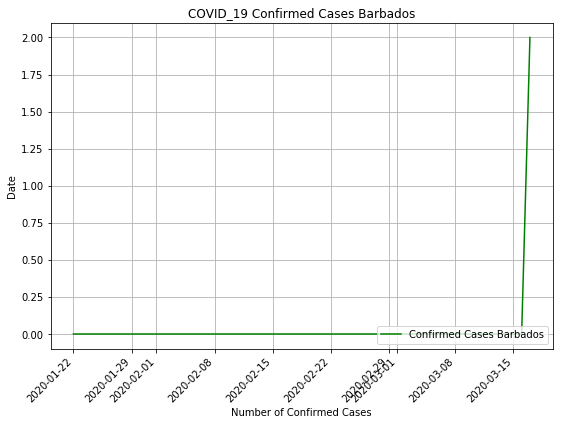

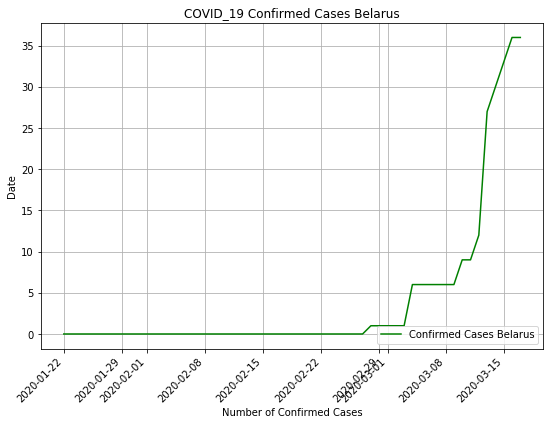

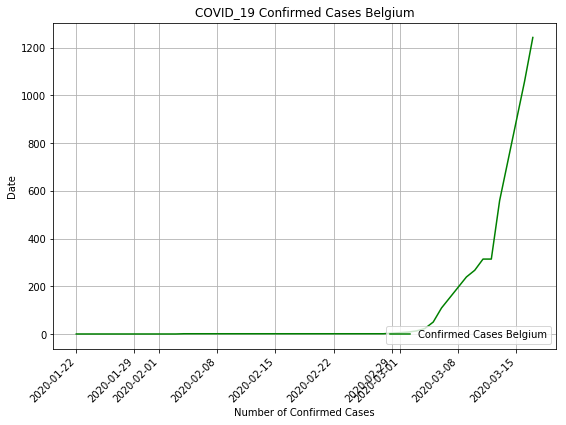

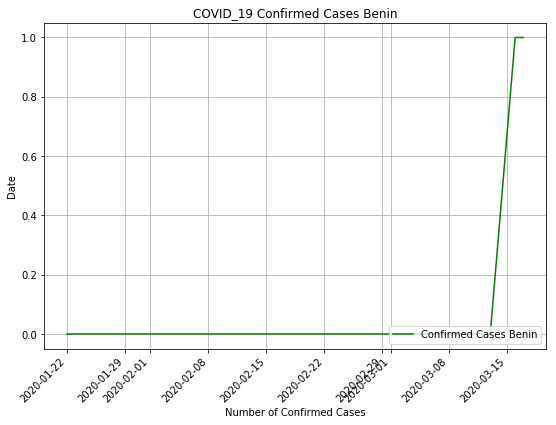

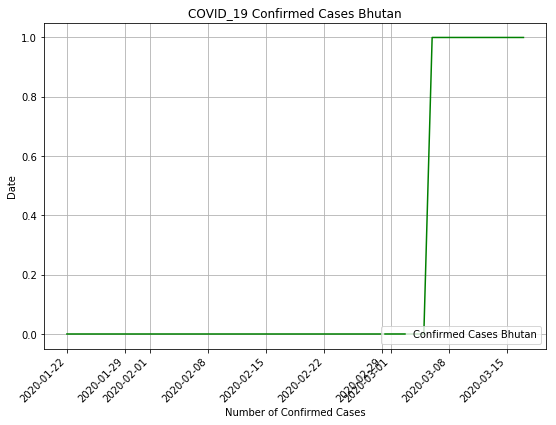

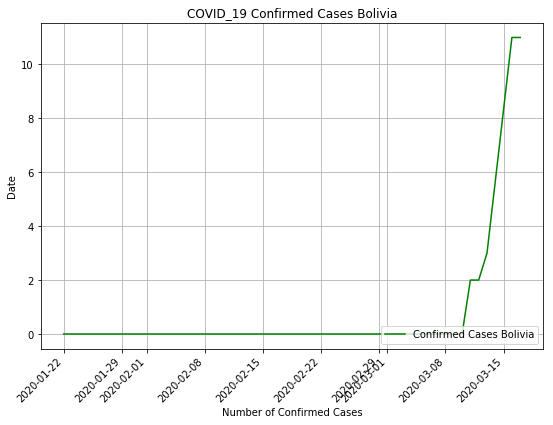

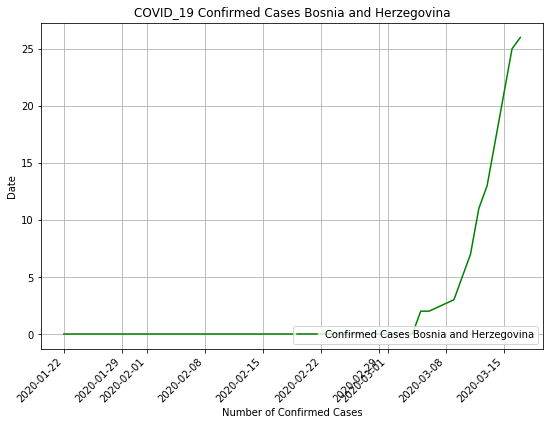

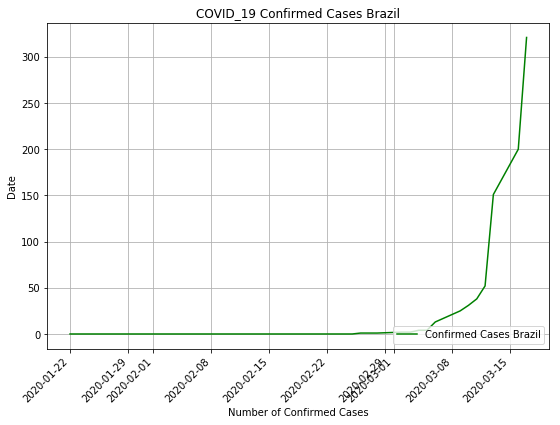

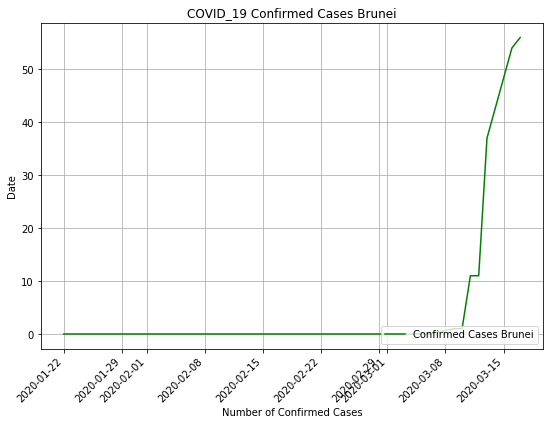

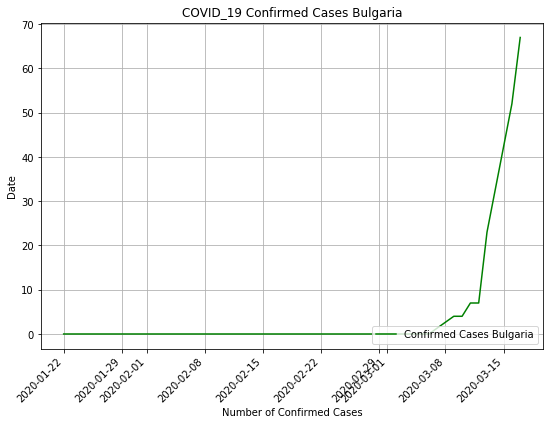

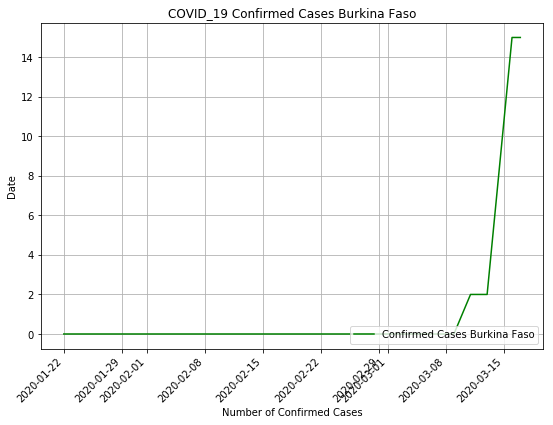

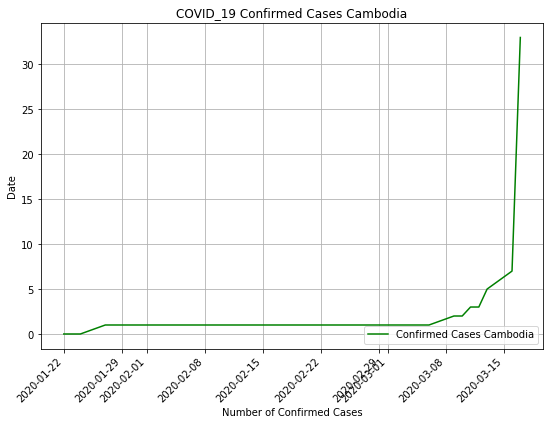

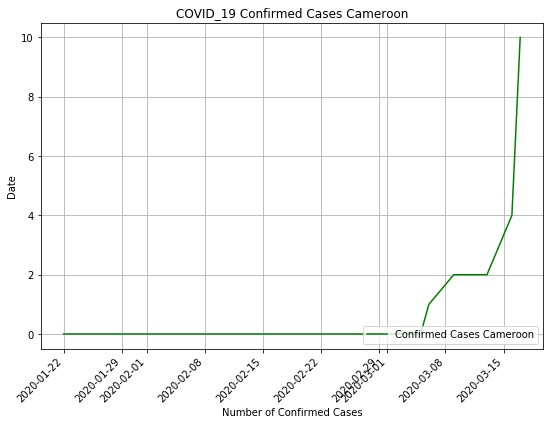

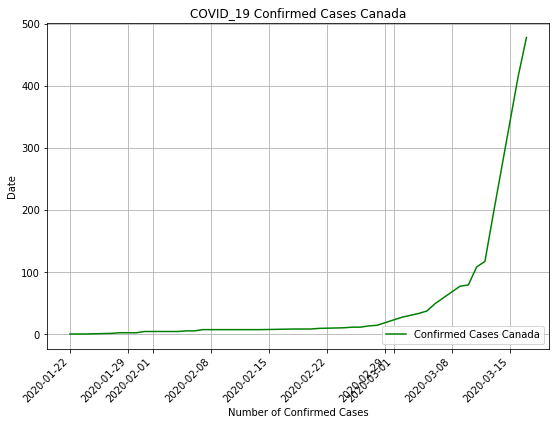

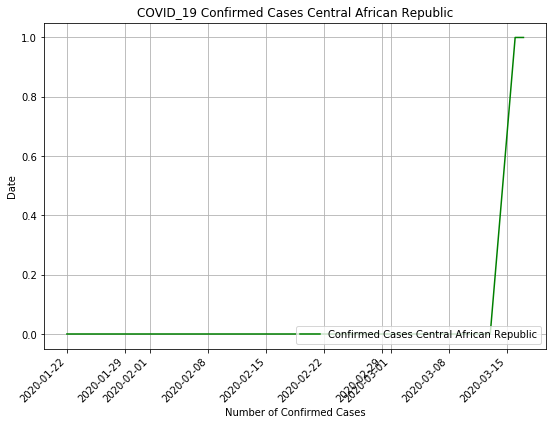

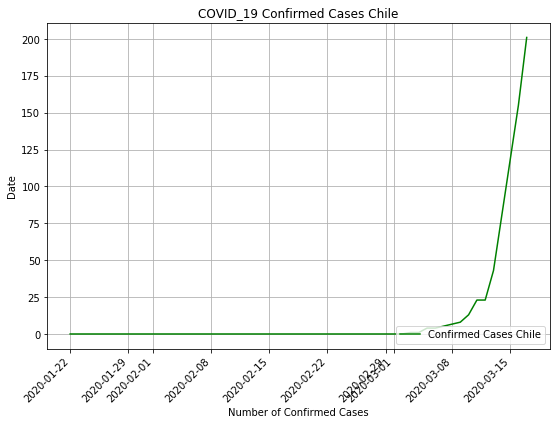

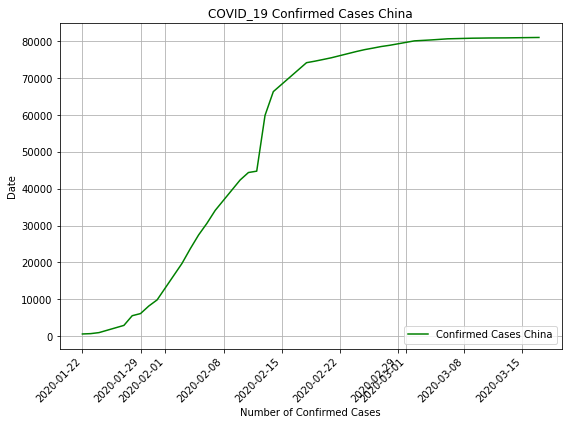

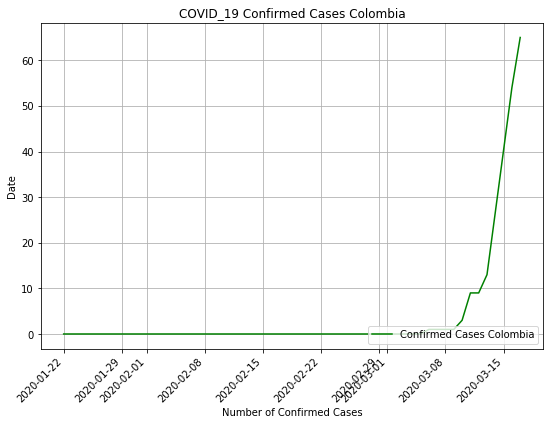

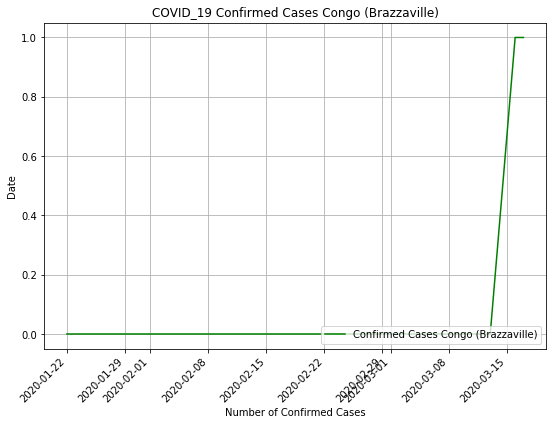

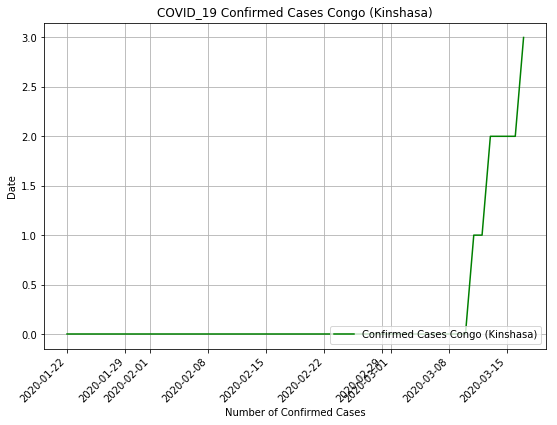

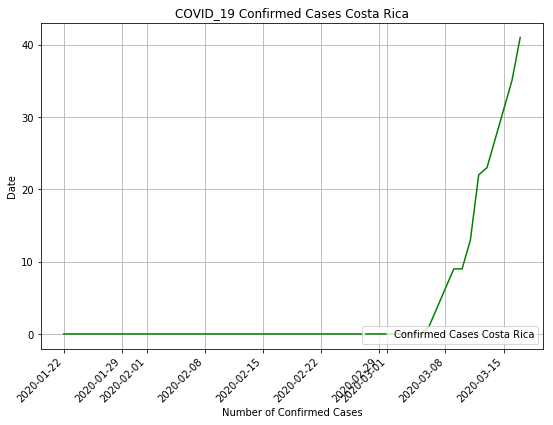

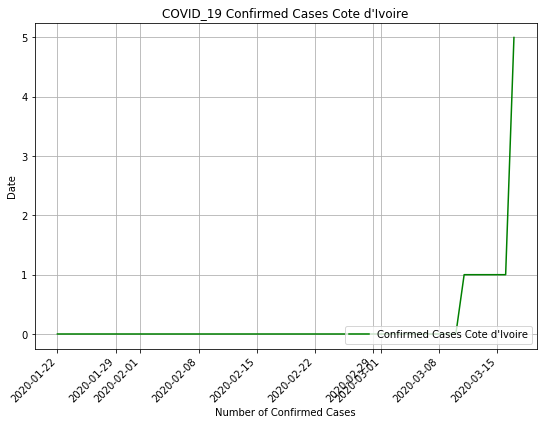

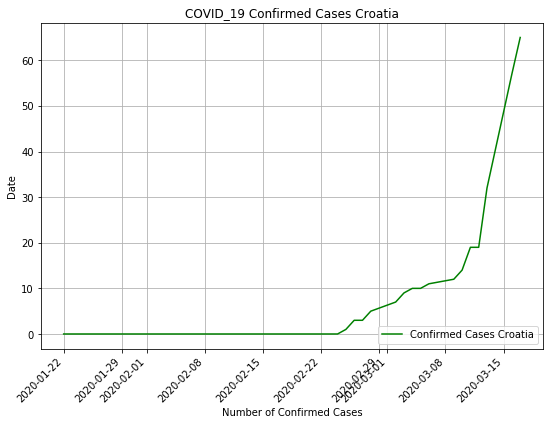

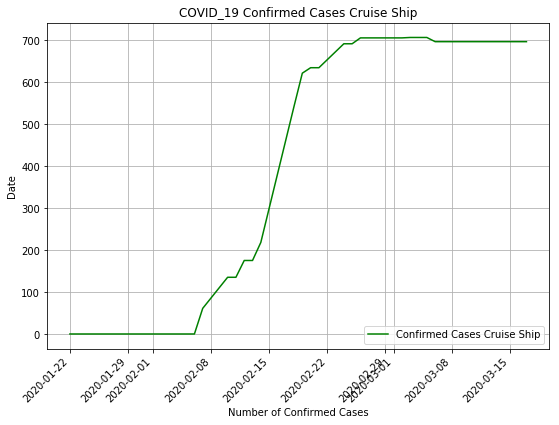

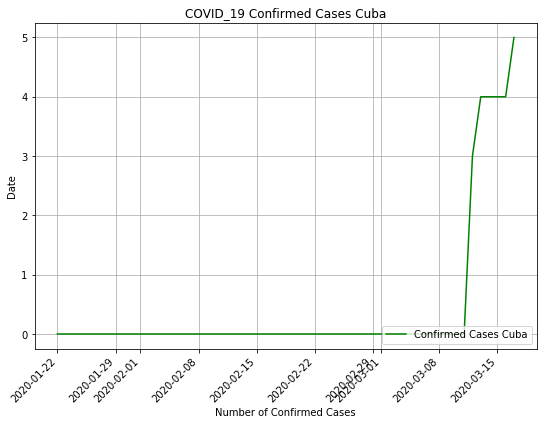

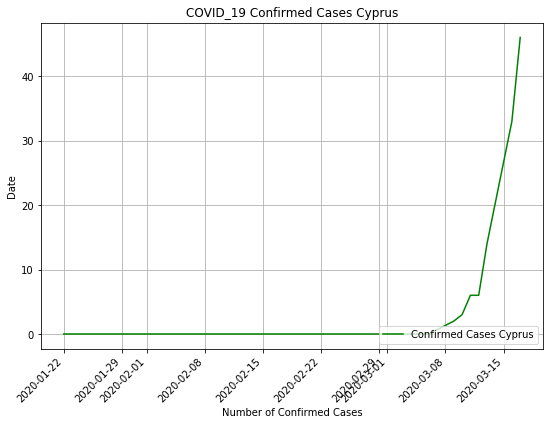

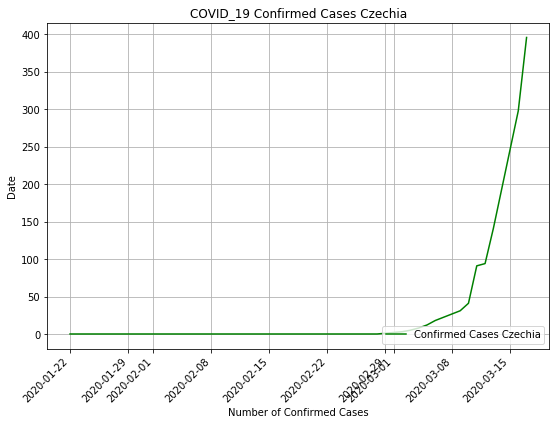

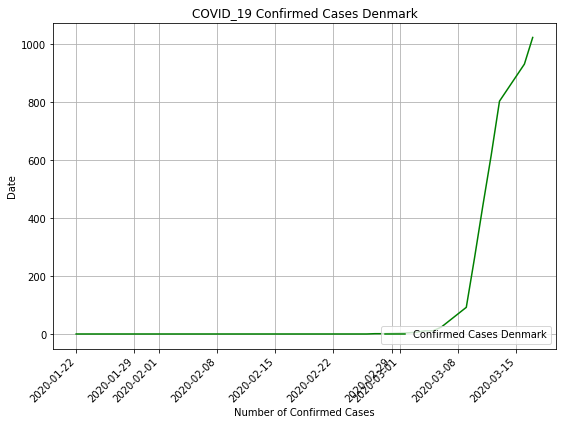

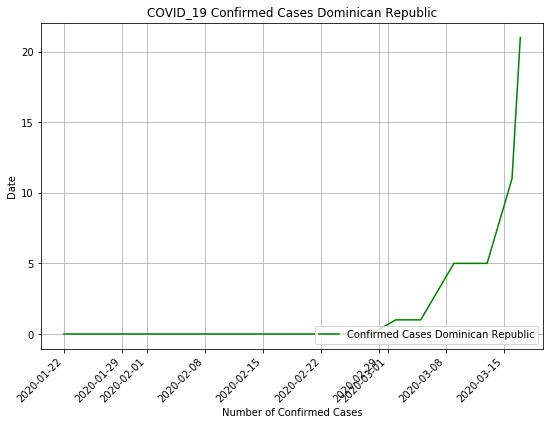

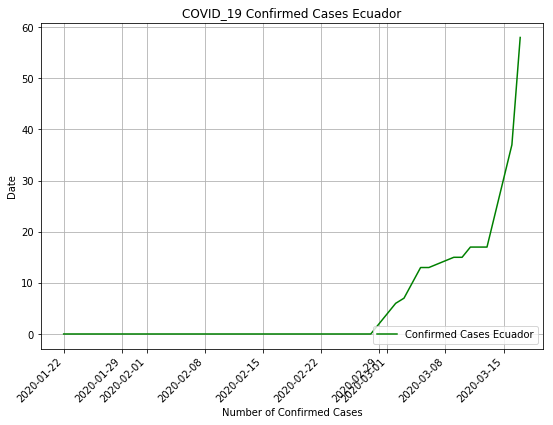

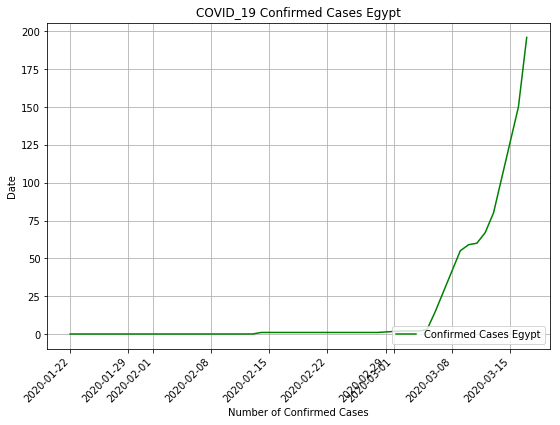

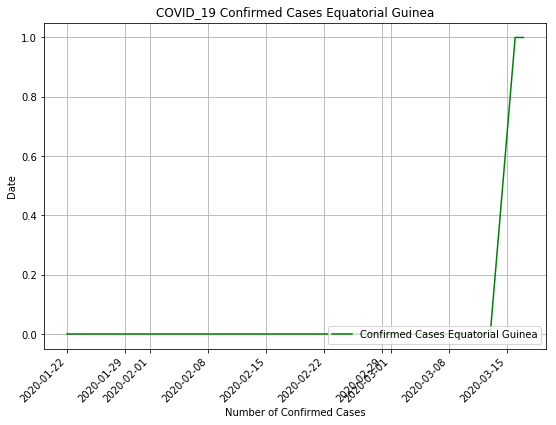

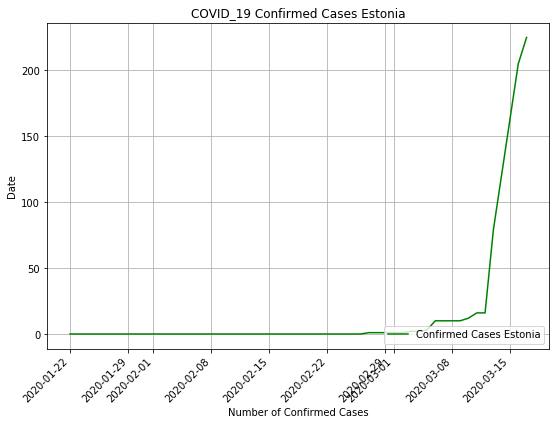

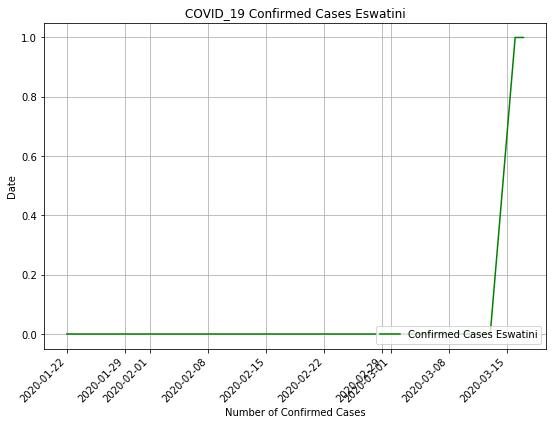

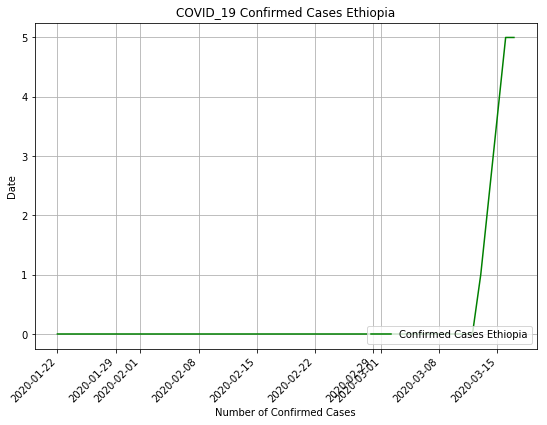

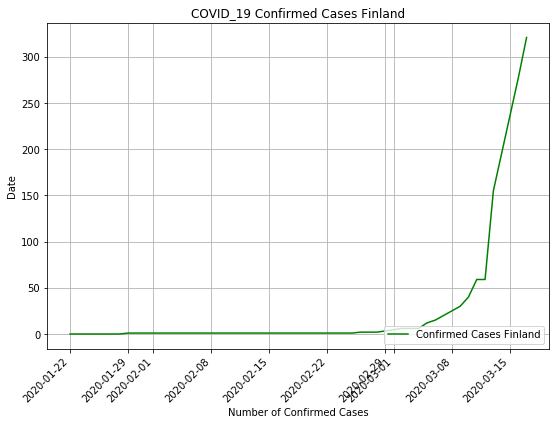

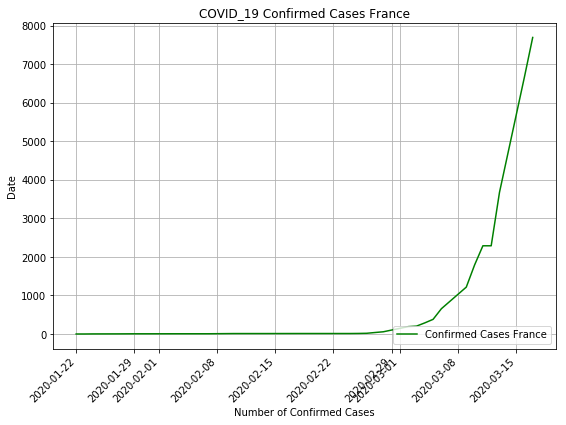

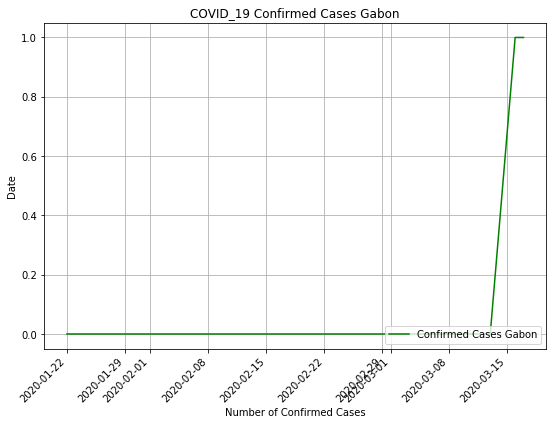

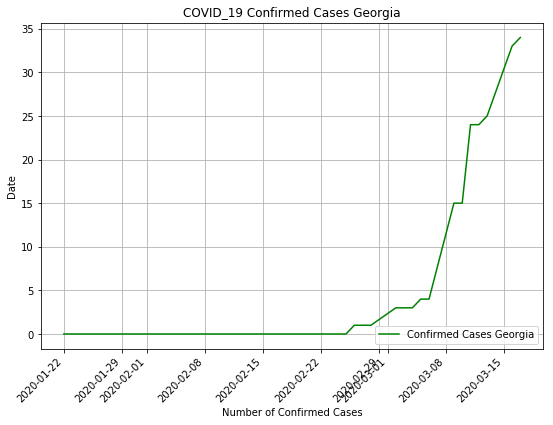

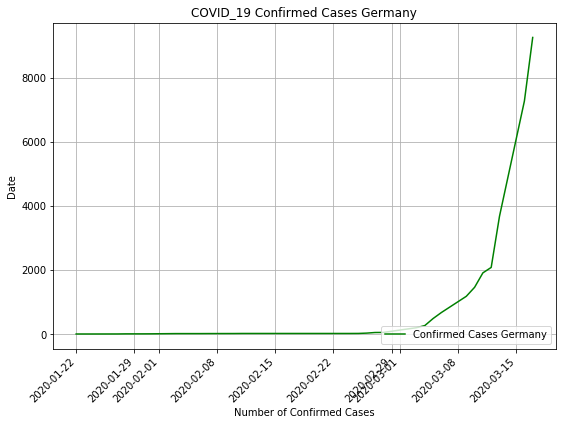

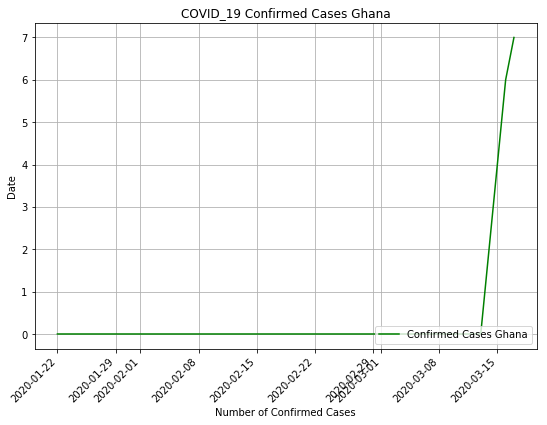

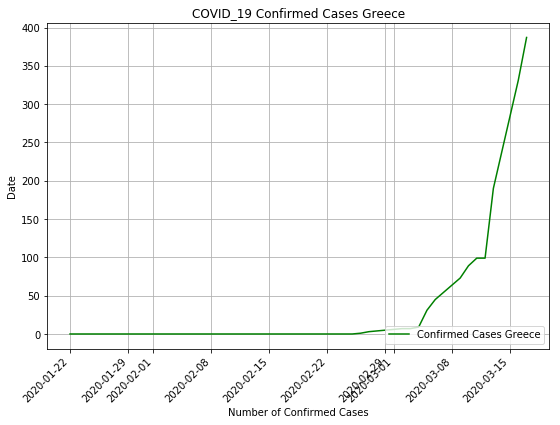

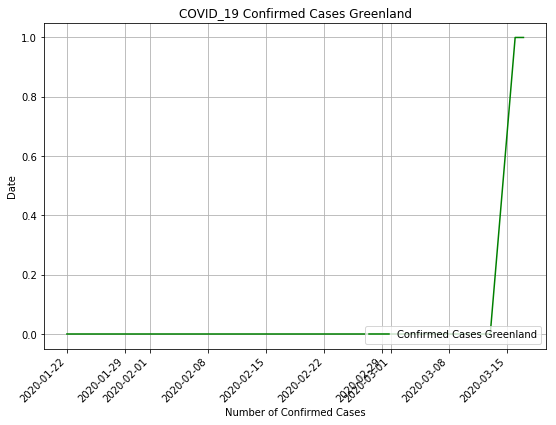

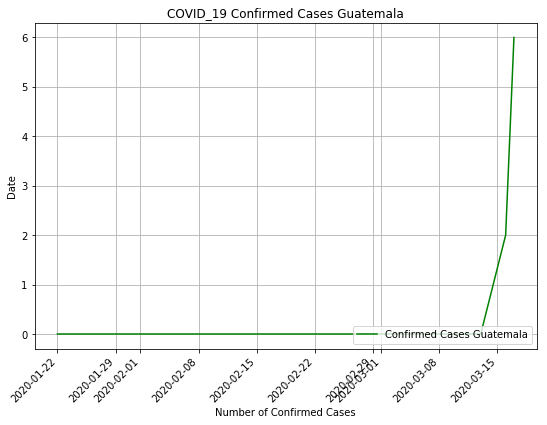

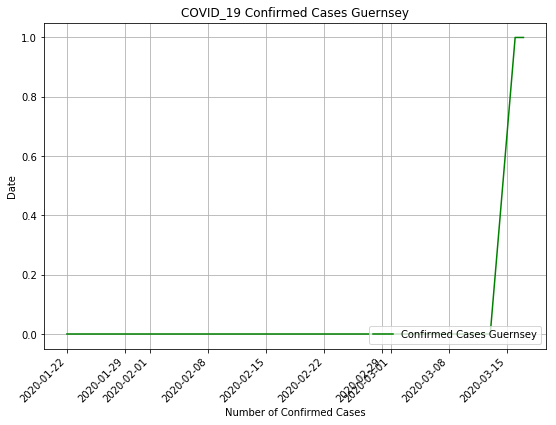

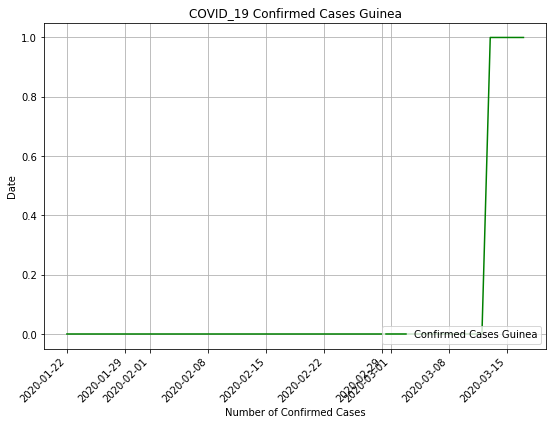

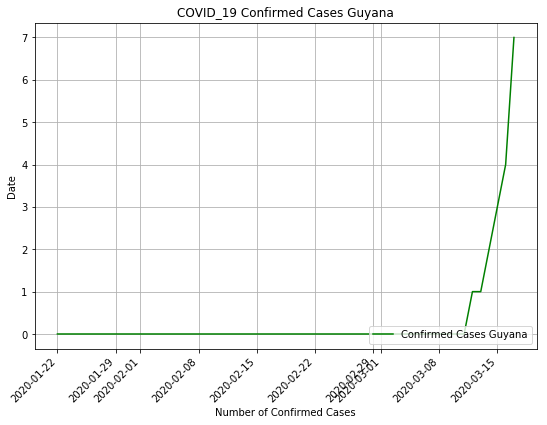

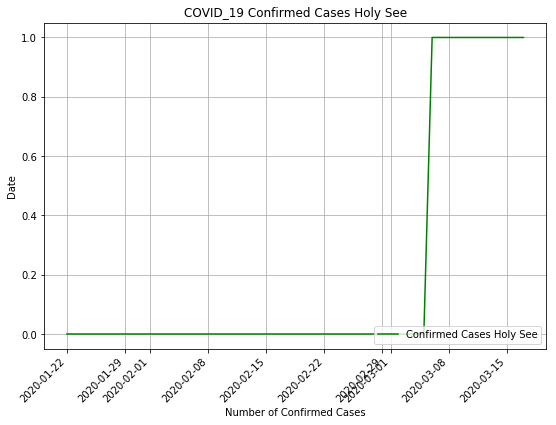

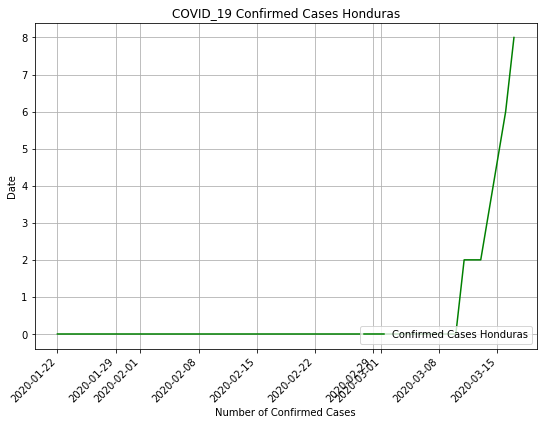

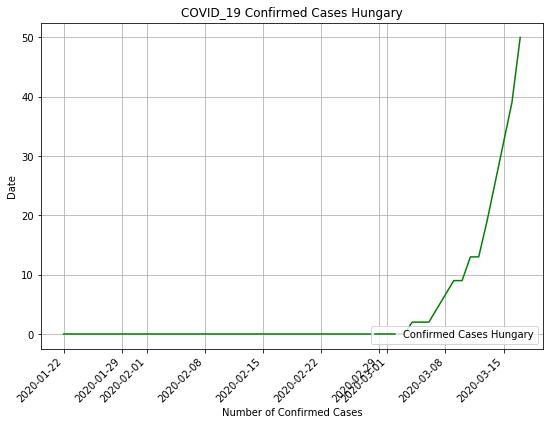

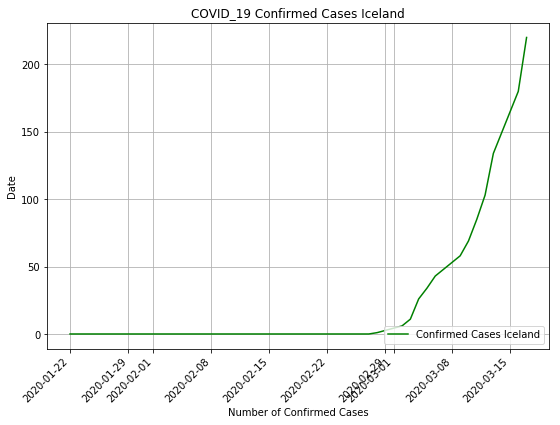

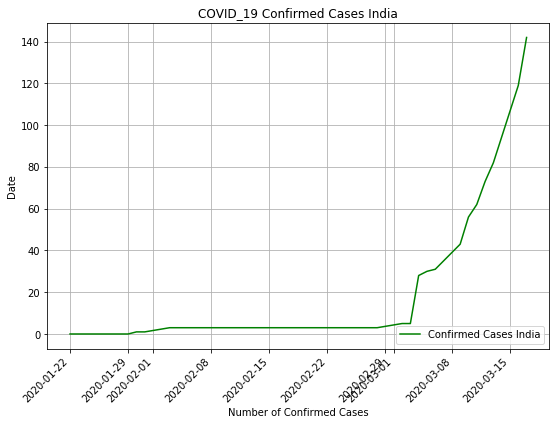

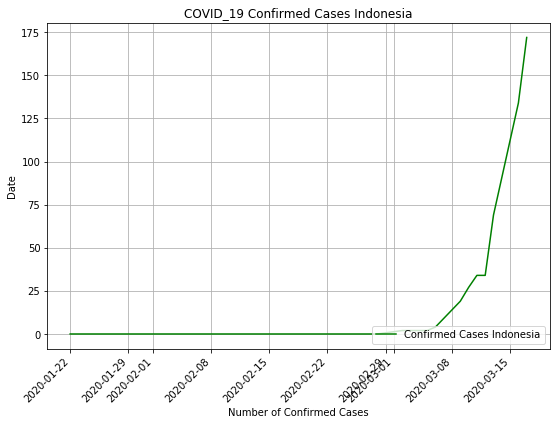

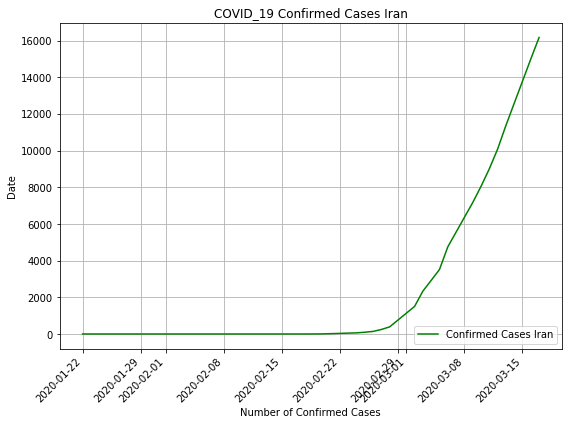

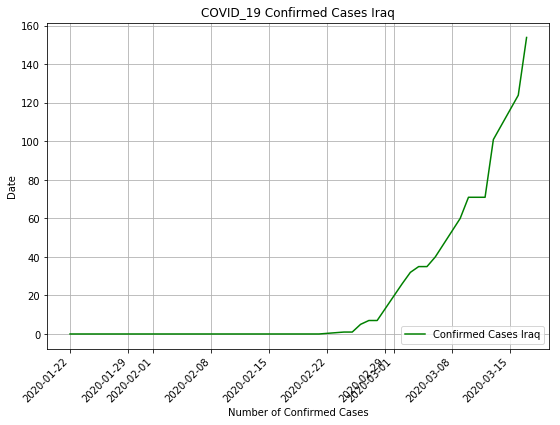

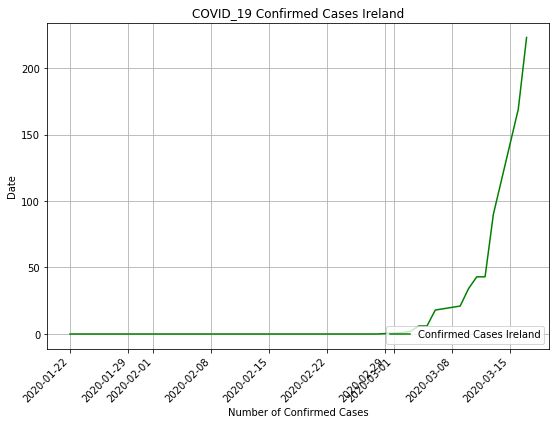

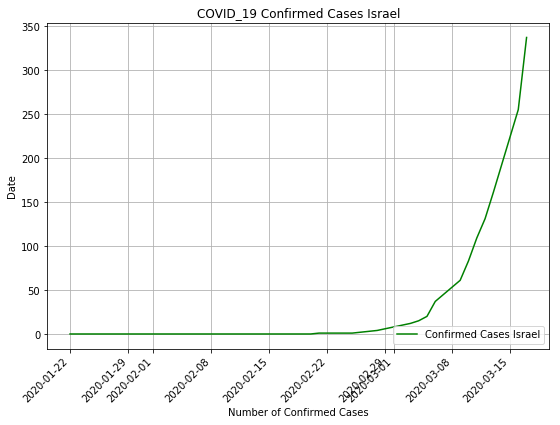

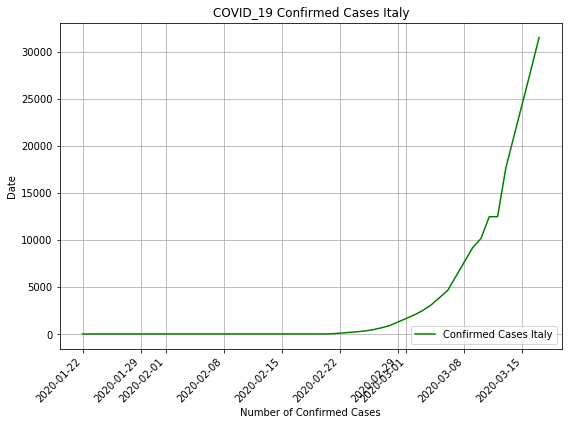

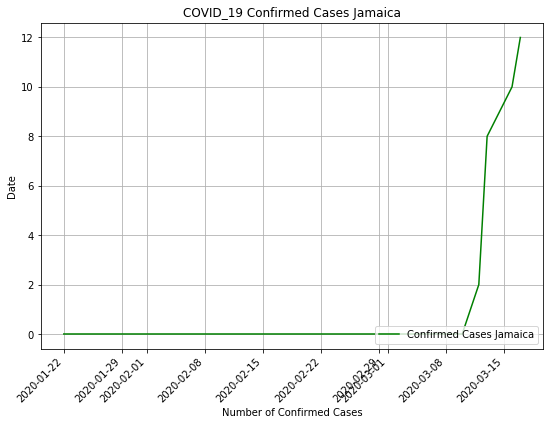

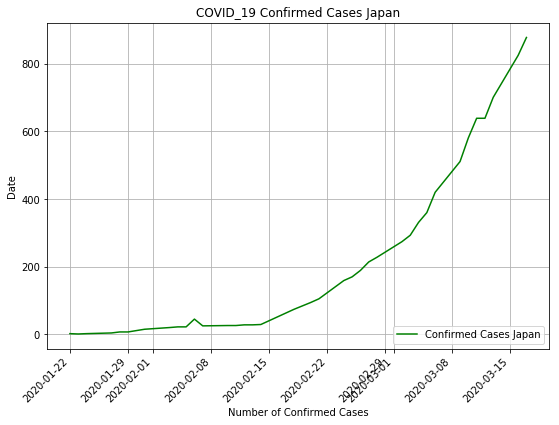

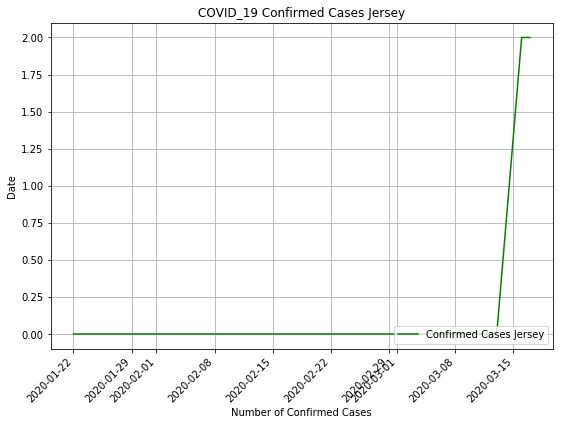

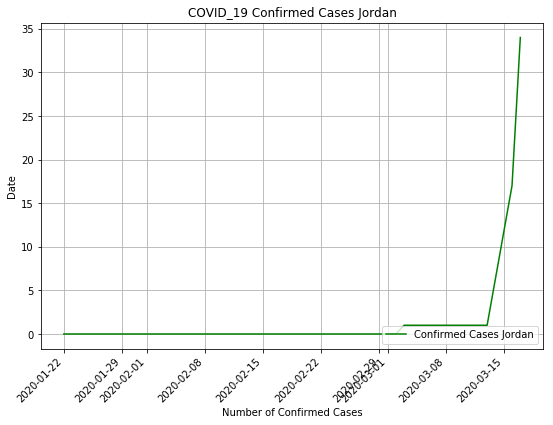

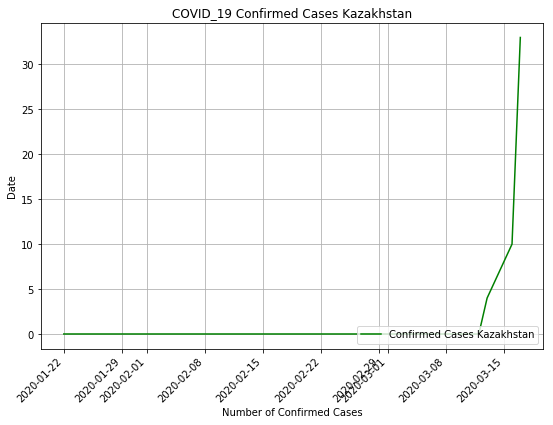

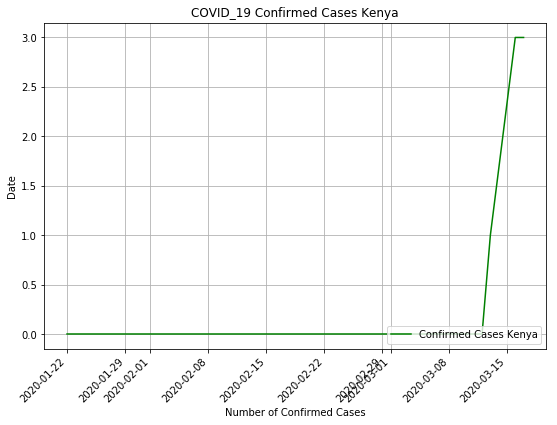

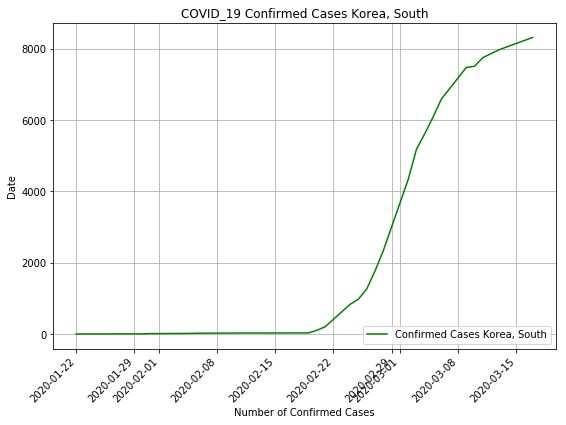

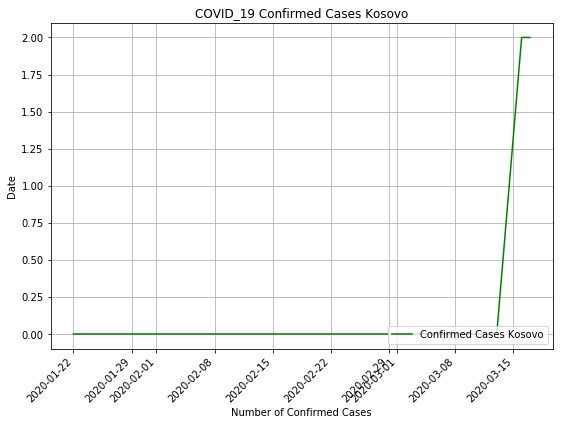

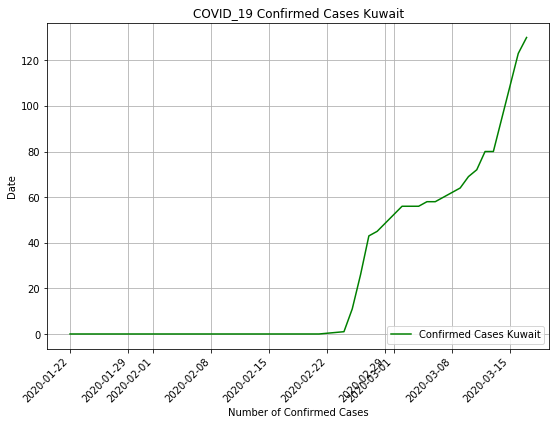

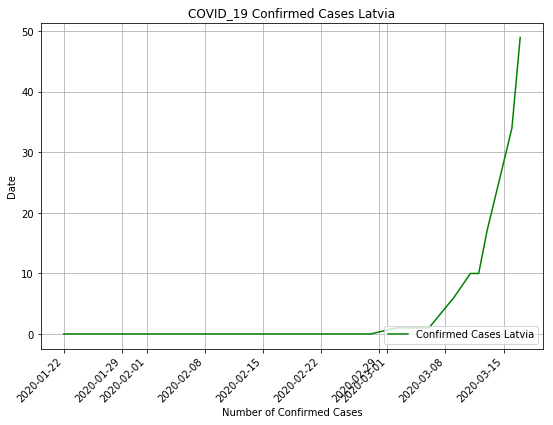

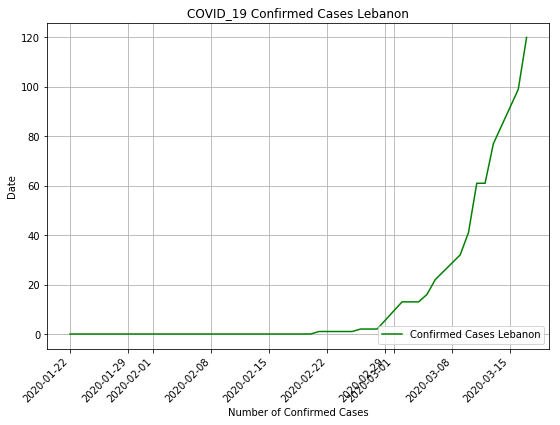

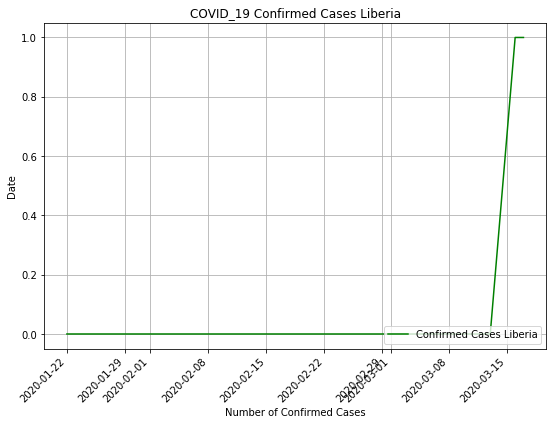

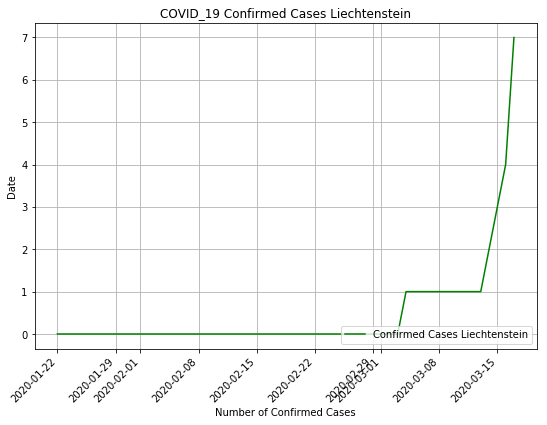

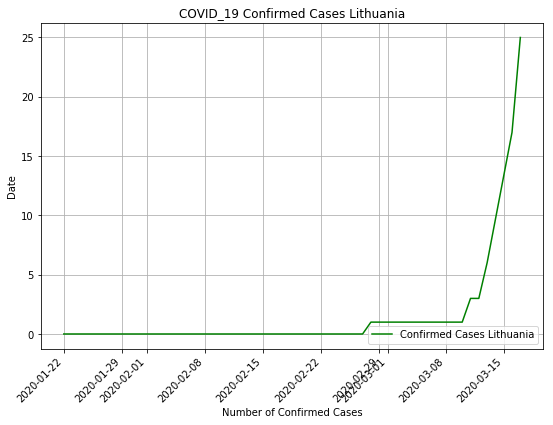

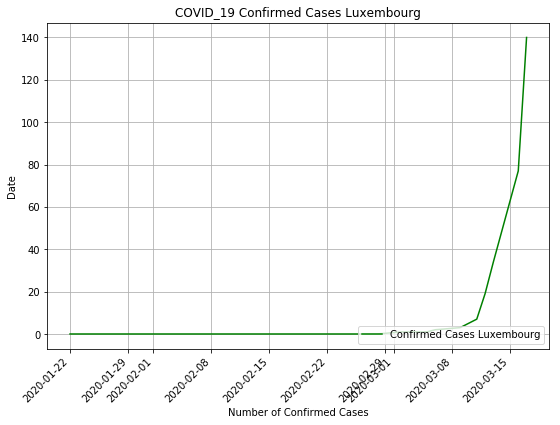

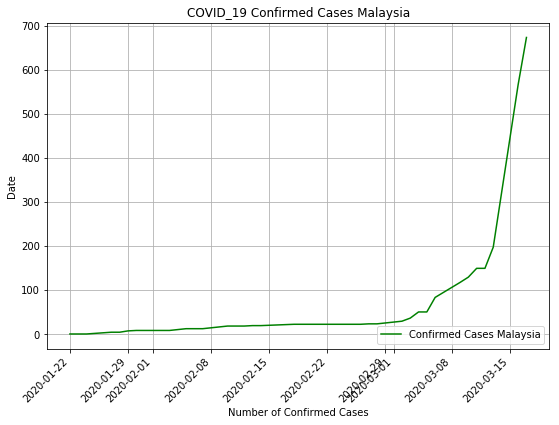

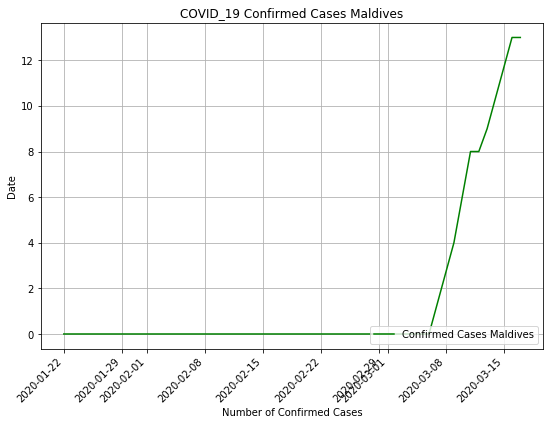

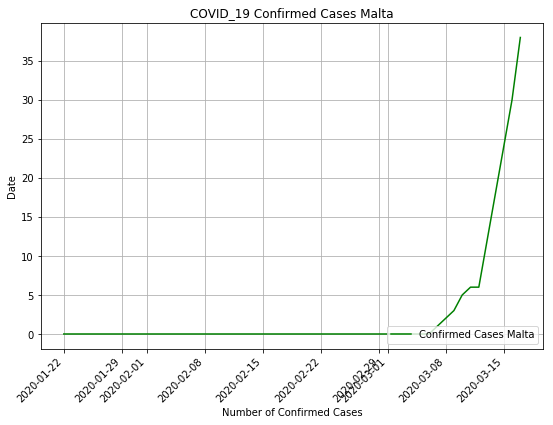

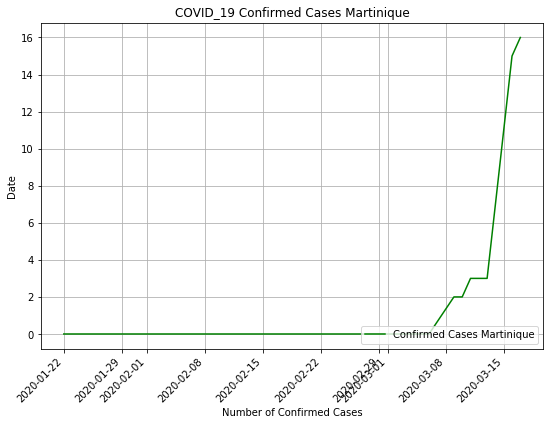

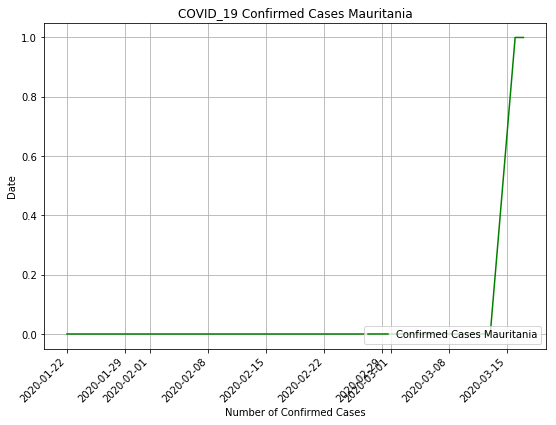

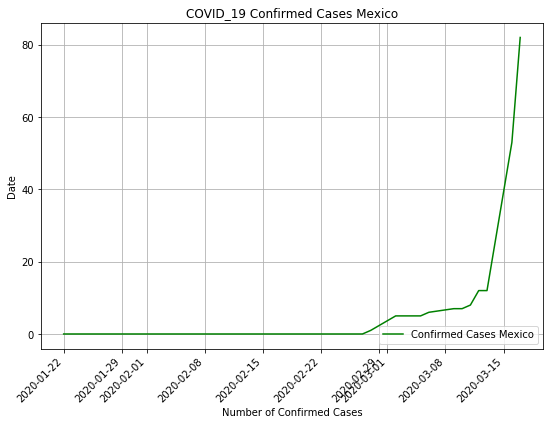

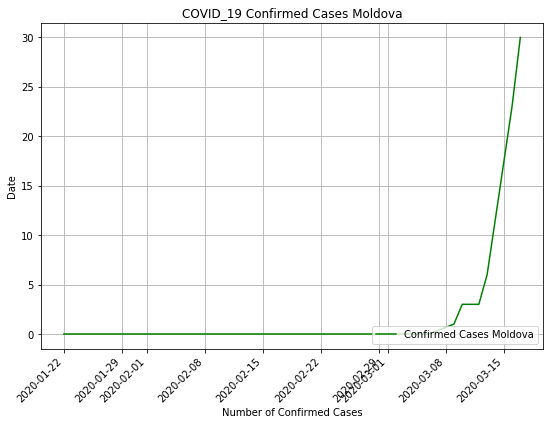

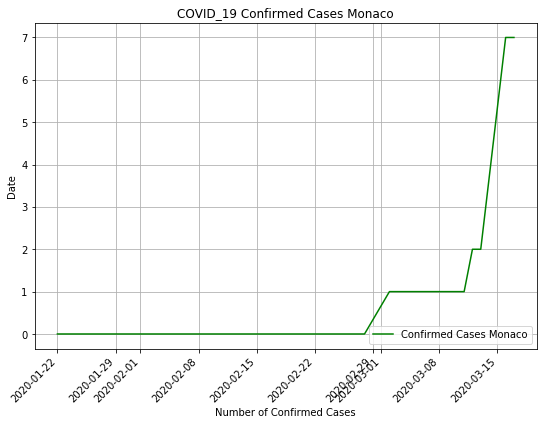

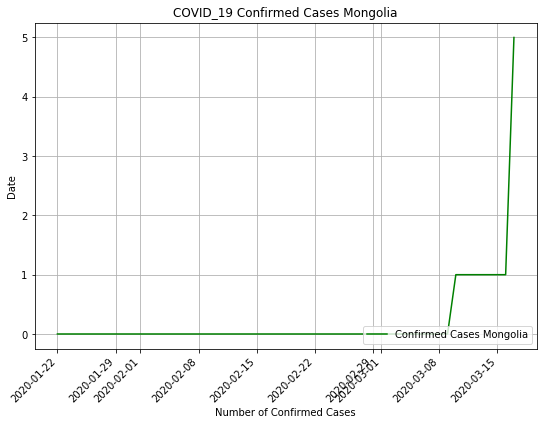

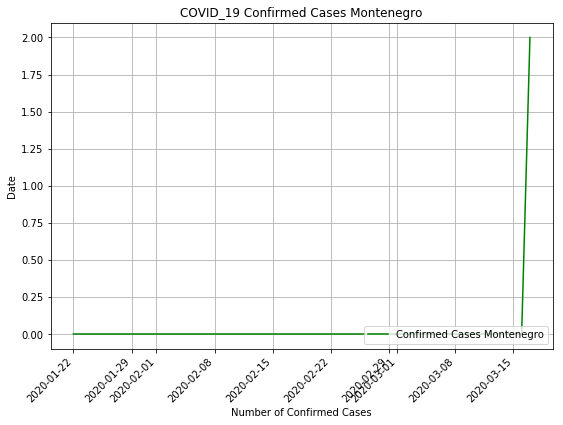

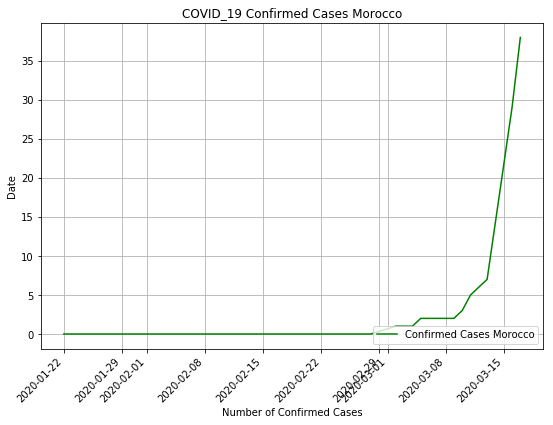

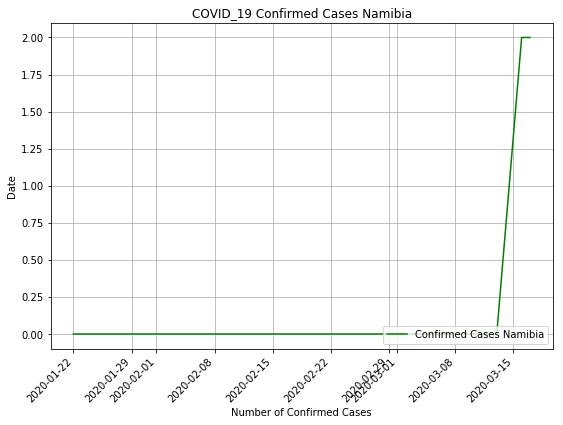

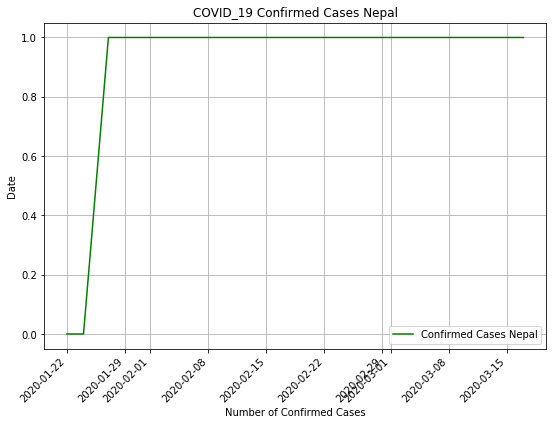

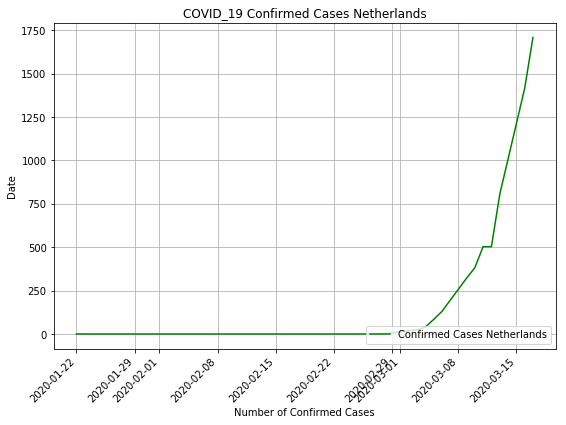

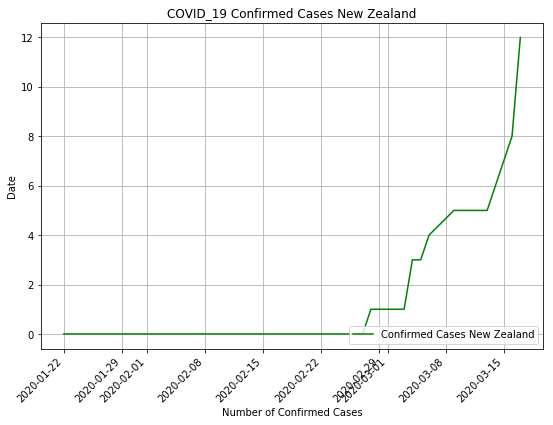

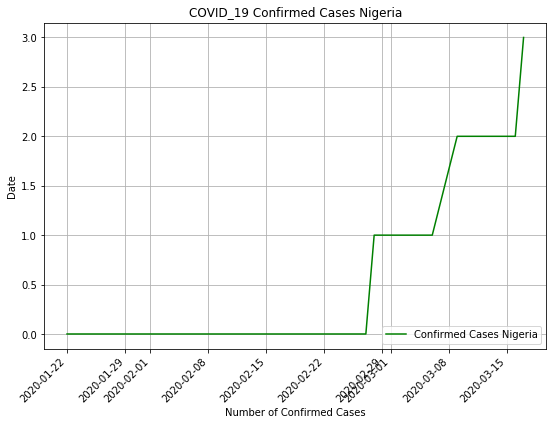

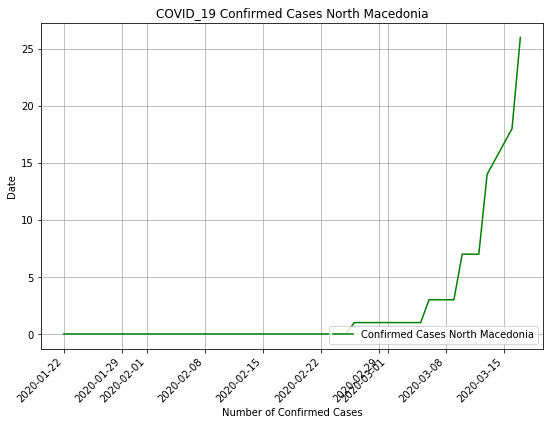

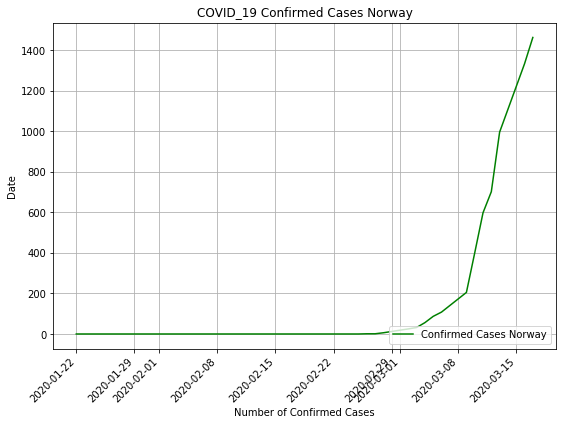

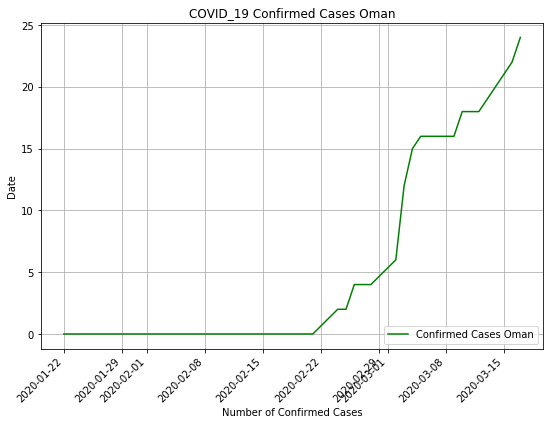

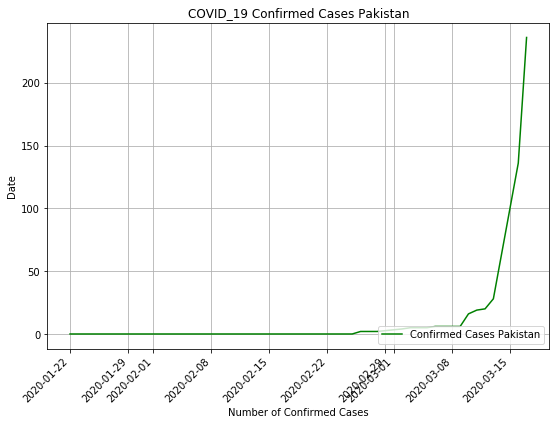

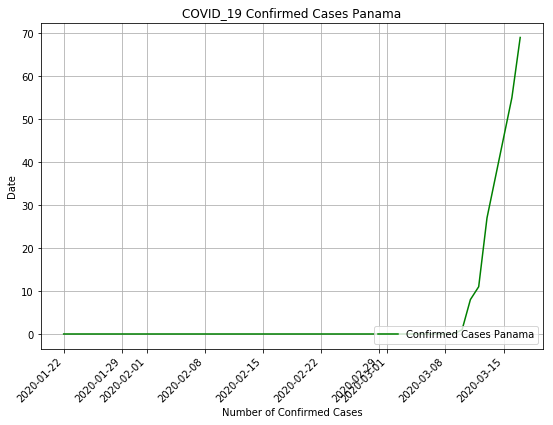

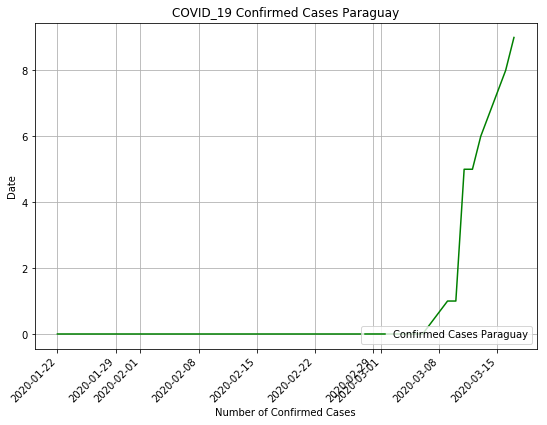

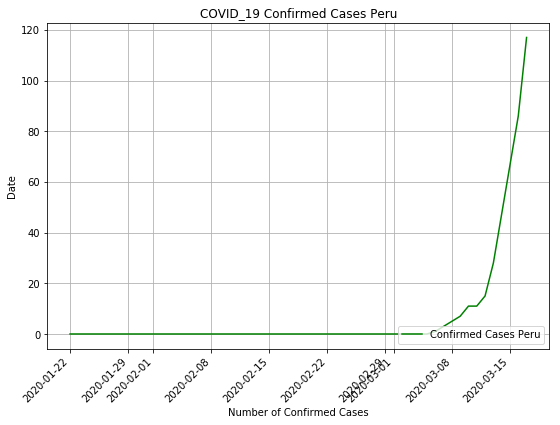

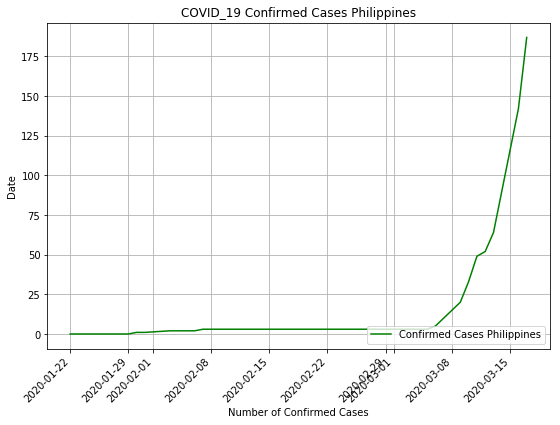

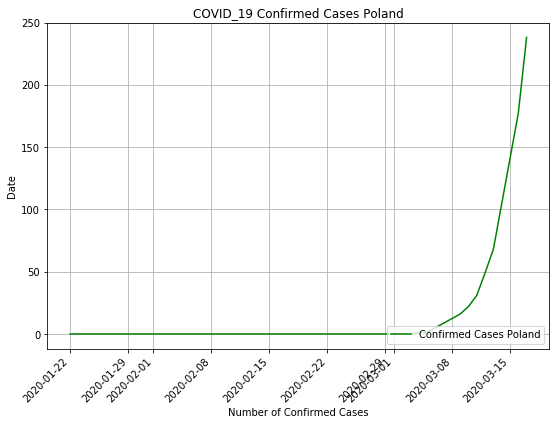

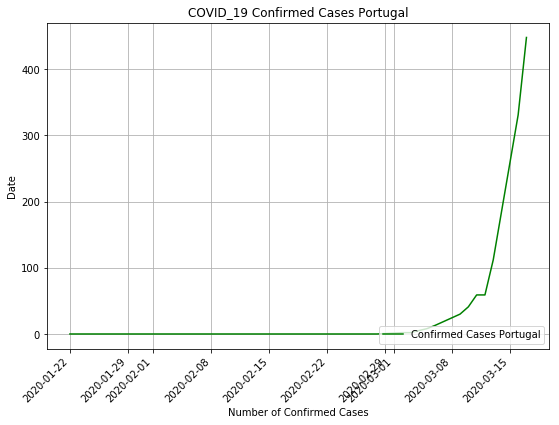

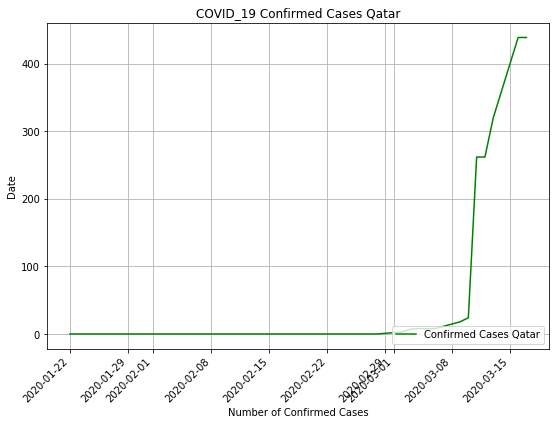

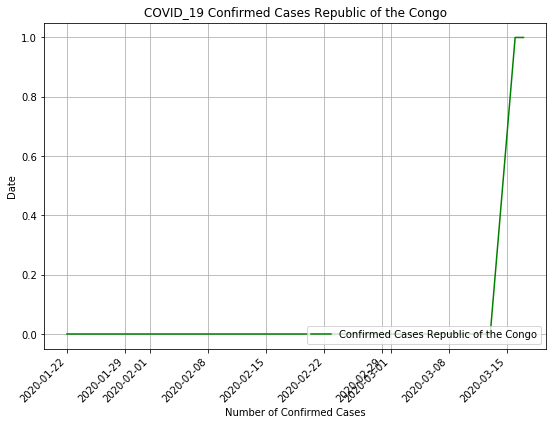

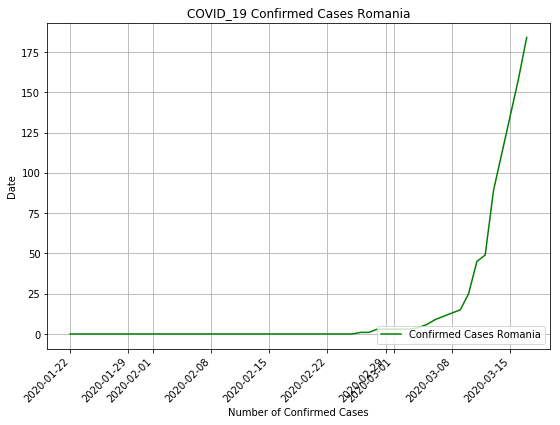

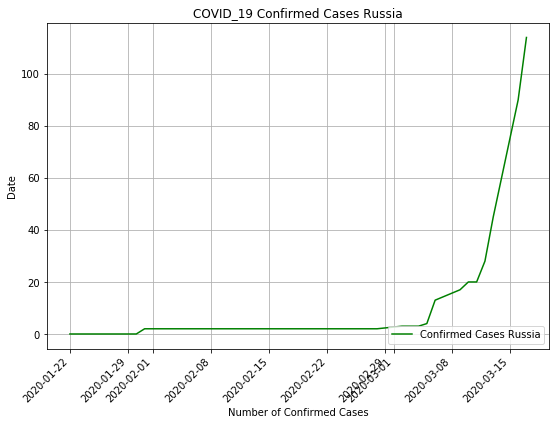

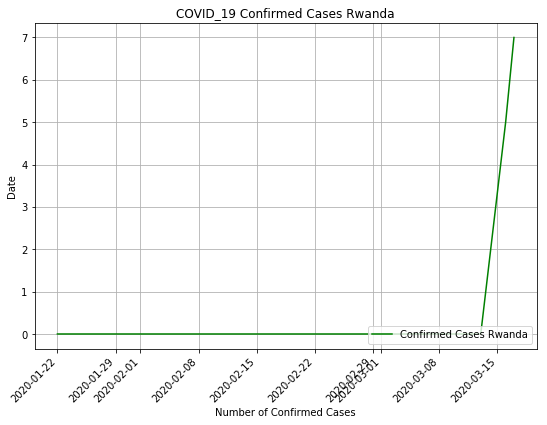

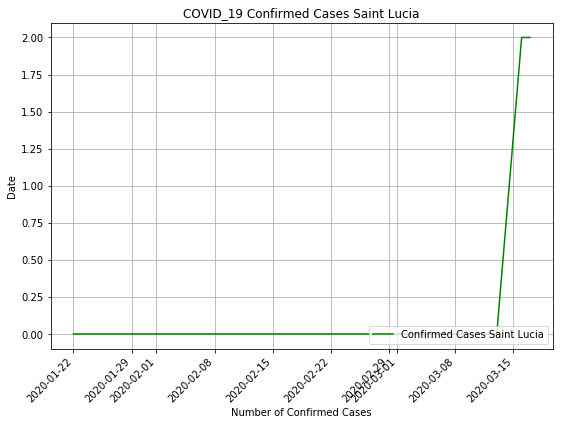

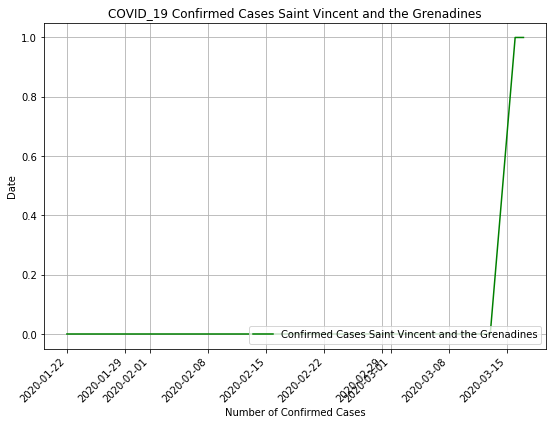

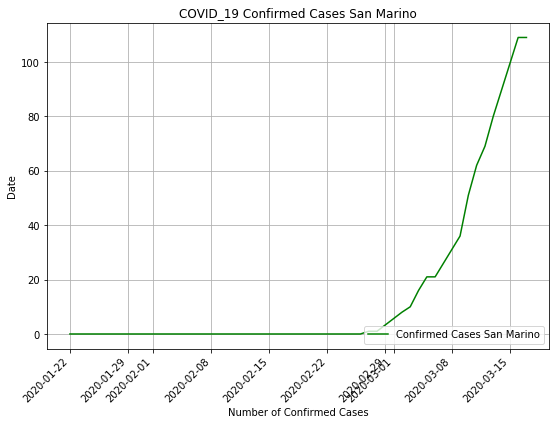

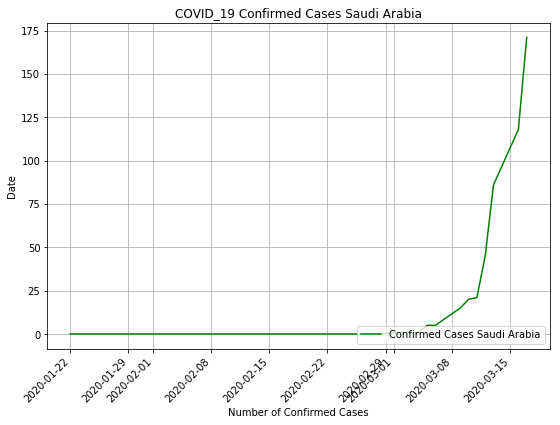

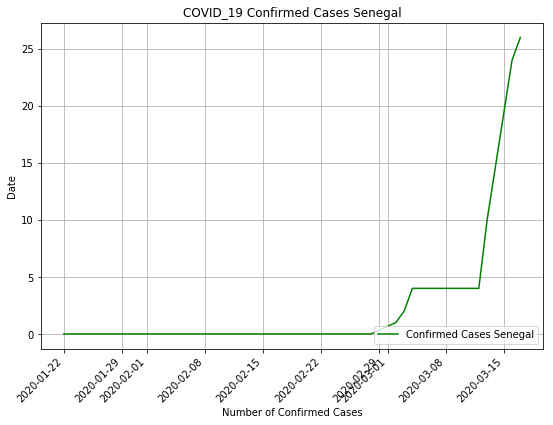

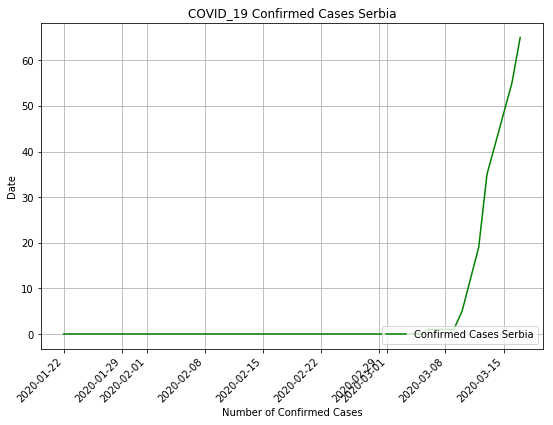

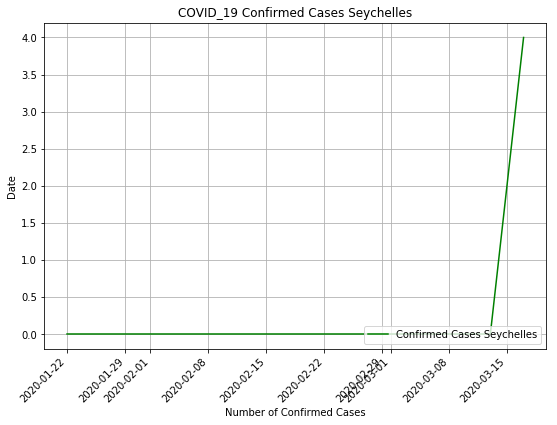

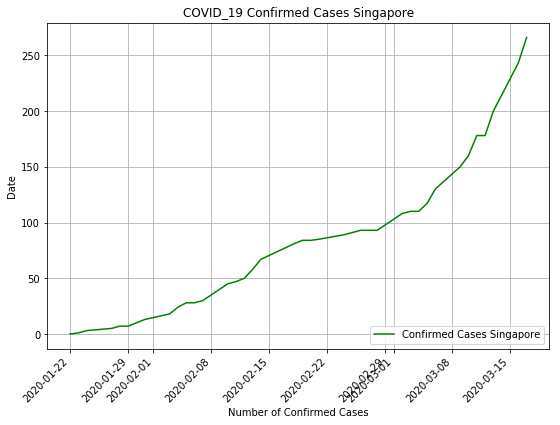

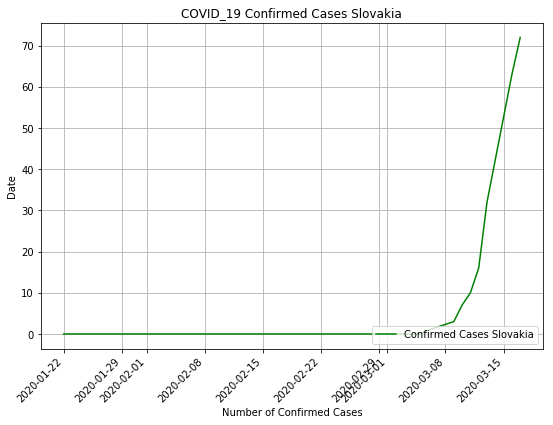

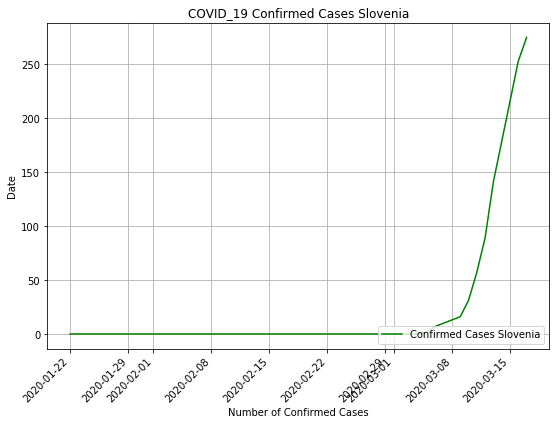

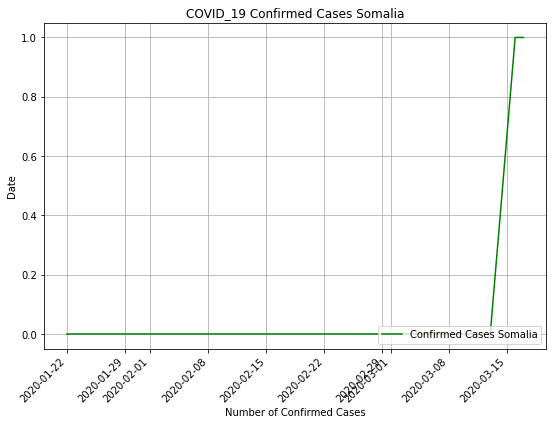

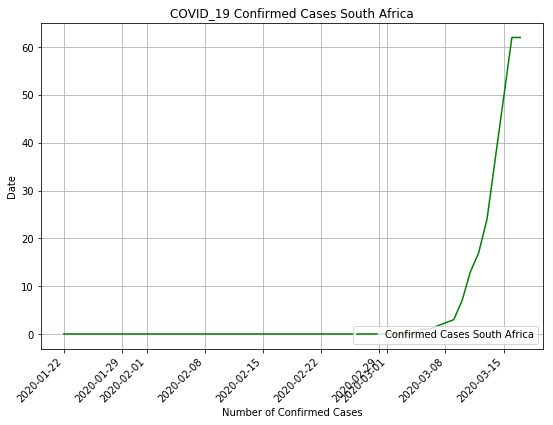

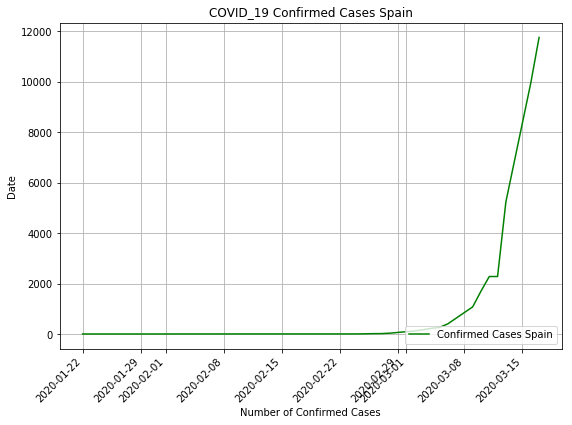

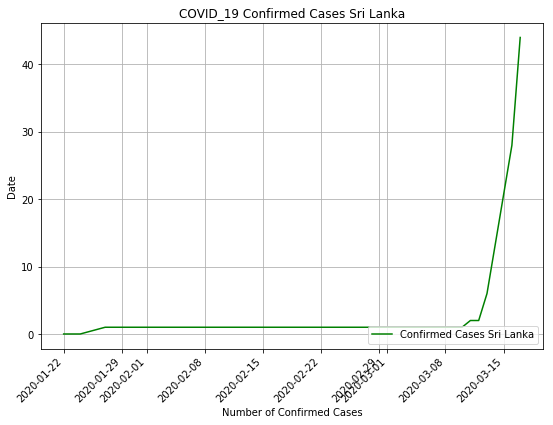

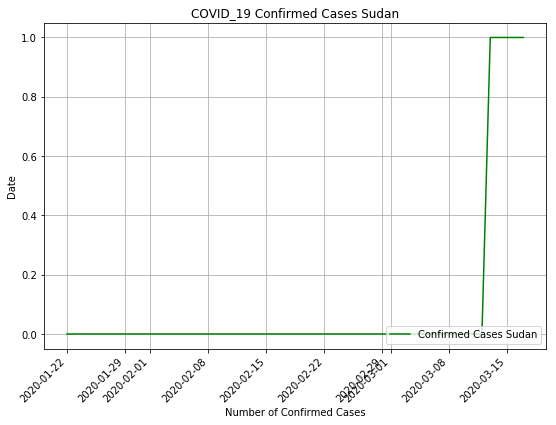

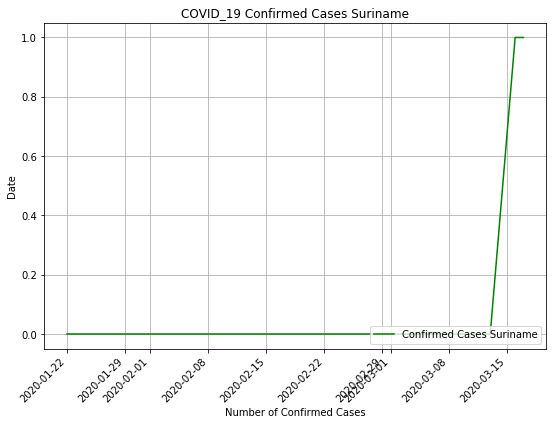

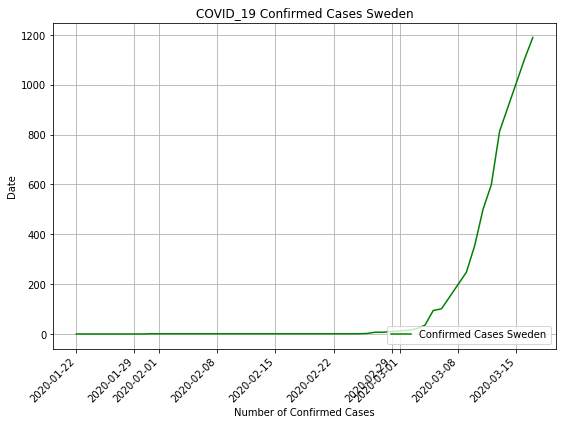

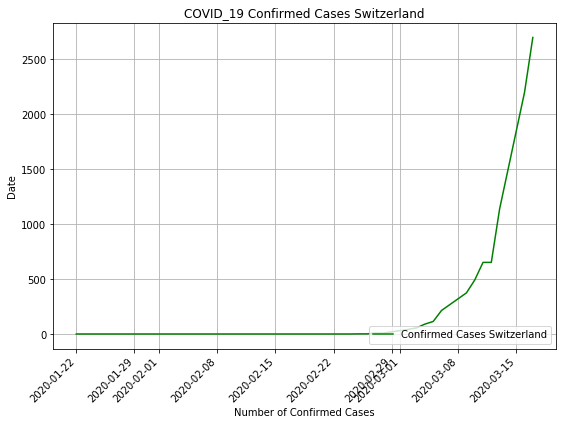

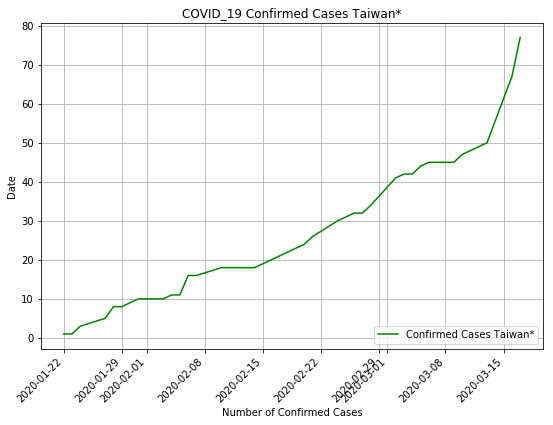

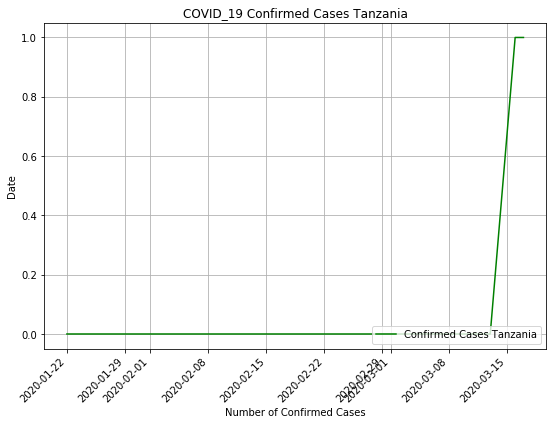

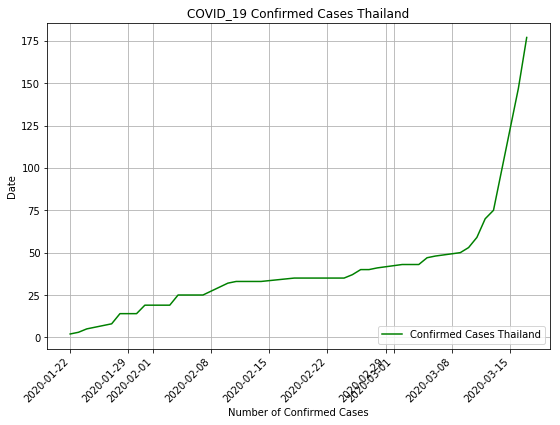

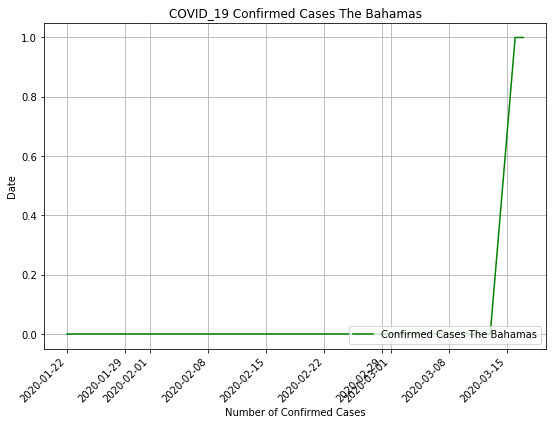

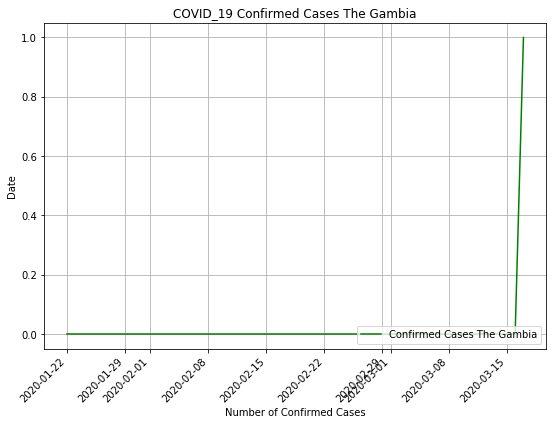

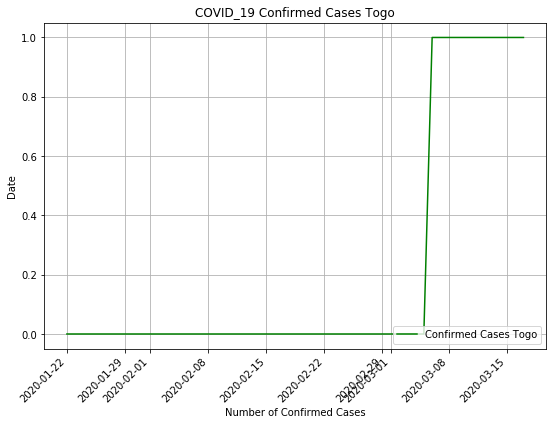

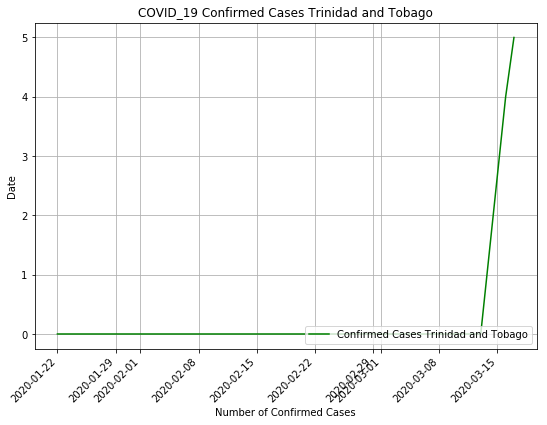

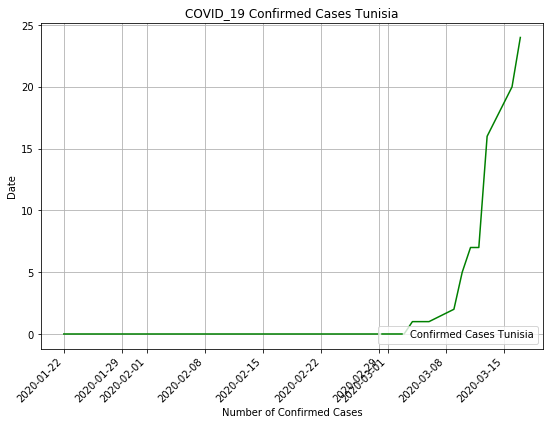

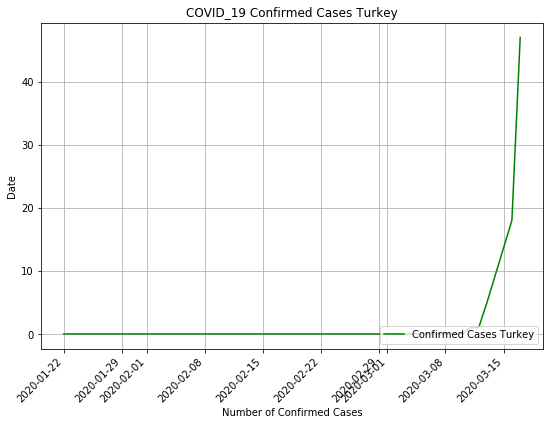

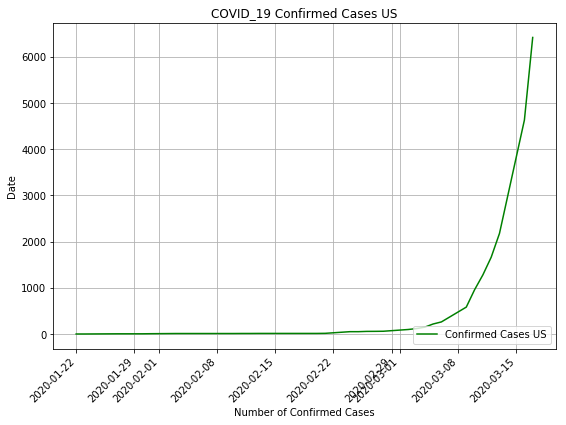

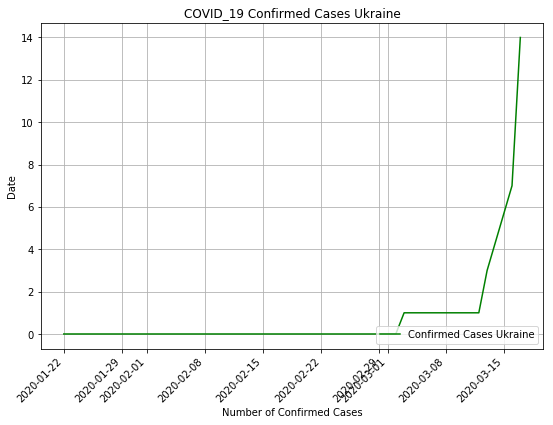

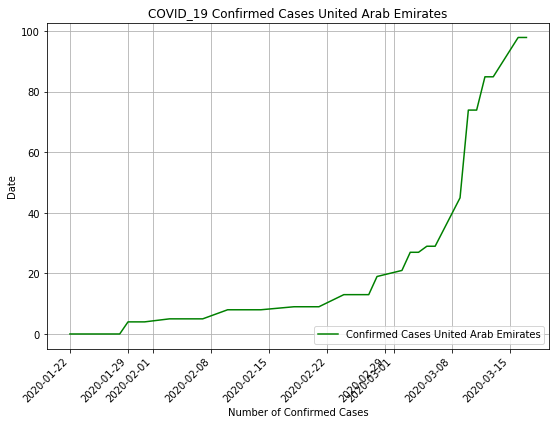

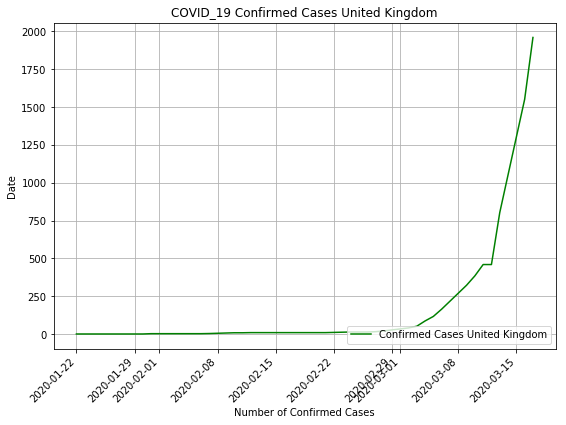

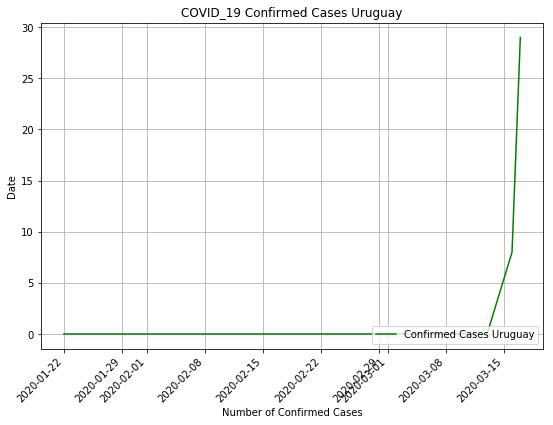

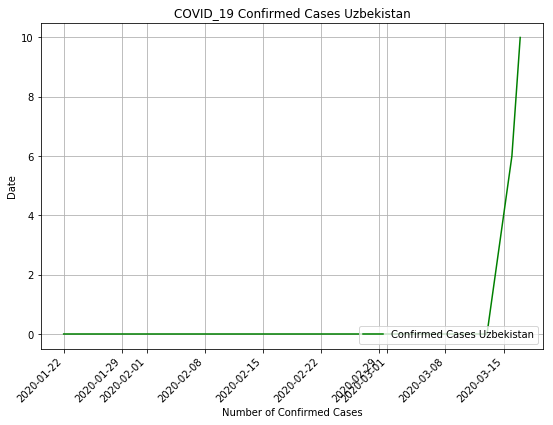

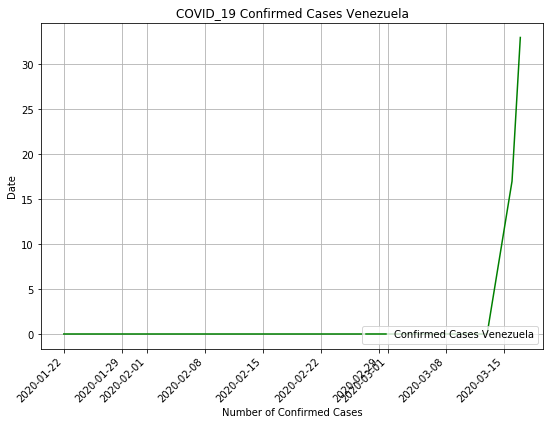

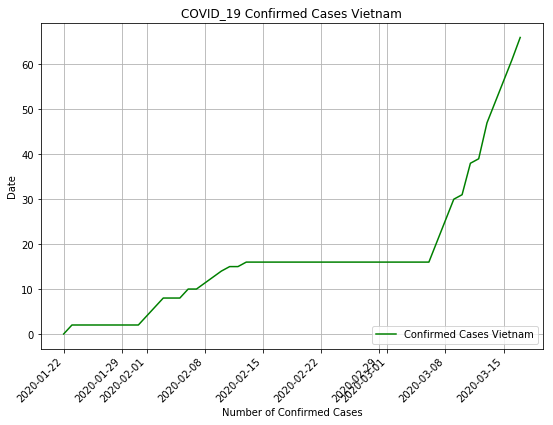

In [29]:
for x in (COVID_19_C_2.columns):
    ax = plt.gca()
    plt.rcParams['figure.figsize'] = [9, 6]
    ax.plot(COVID_19_C_2.index, COVID_19_C_2[x], 'k-', label=('Confirmed Cases ' + x), color = 'g')
    ax.set_xlabel('Number of Confirmed Cases')
    ax.set_ylabel('Date')
    plt.title('COVID_19 Confirmed Cases ' + x)
    ax.legend(loc="lower right")
    plt.xticks(rotation=45, ha='right')
    ax.grid()
    plt.show()

In [30]:
from cycler import cycler
from matplotlib.colors import hsv_to_rgb

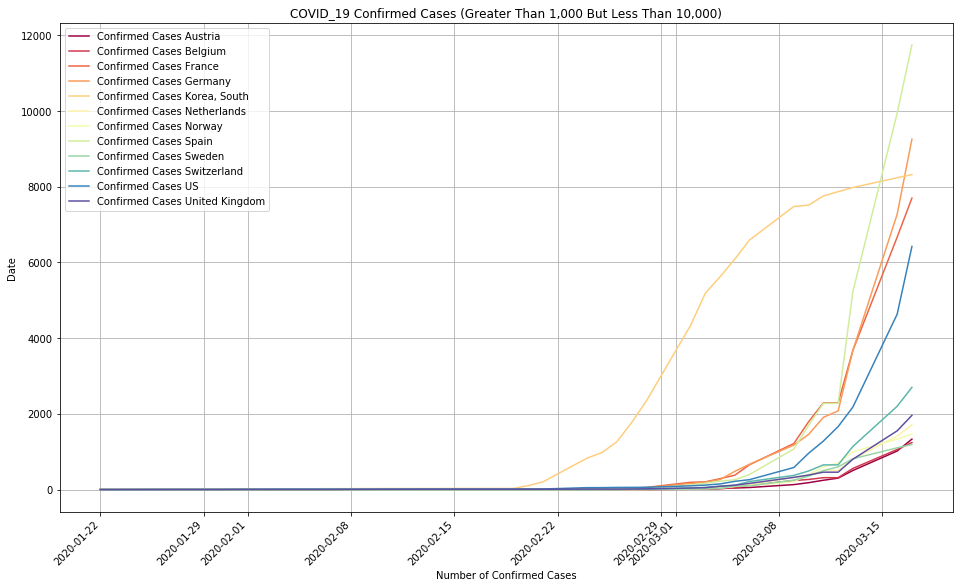

In [31]:
#Lets Plot the Countries who have less than 1000 cases but more than 100
#HOW TO GET COLOURS TO AUTO SELECT?

#ax = plt.gca()
plt.rcParams['figure.figsize'] = [16, 9]
#colors = [hsv_to_rgb([(i * 0.618033988749895) % 1.0, 1, 1])
#          for i in range(1000)]
#ax.rc('axes', prop_cycle=(cycler('color', colors)))
#ax.set_prop_cycle(color=cycler('color', colors))



ax = plt.subplot(111)
ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,12)))

ax.plot(COVID_19_C_2.index, COVID_19_C_2.Austria, label='Confirmed Cases Austria')
ax.plot(COVID_19_C_2.index, COVID_19_C_2.Belgium, label='Confirmed Cases Belgium')
ax.plot(COVID_19_C_2.index, COVID_19_C_2.France, label='Confirmed Cases France')
ax.plot(COVID_19_C_2.index, COVID_19_C_2.Germany, label='Confirmed Cases Germany')
ax.plot(COVID_19_C_2.index, COVID_19_C_2['Korea, South'], label='Confirmed Cases Korea, South')
ax.plot(COVID_19_C_2.index, COVID_19_C_2.Netherlands, label='Confirmed Cases Netherlands')
ax.plot(COVID_19_C_2.index, COVID_19_C_2.Norway, label='Confirmed Cases Norway')
ax.plot(COVID_19_C_2.index, COVID_19_C_2.Spain, label='Confirmed Cases Spain')
ax.plot(COVID_19_C_2.index, COVID_19_C_2.Sweden, label='Confirmed Cases Sweden')
ax.plot(COVID_19_C_2.index, COVID_19_C_2.Switzerland, label='Confirmed Cases Switzerland')
ax.plot(COVID_19_C_2.index, COVID_19_C_2.US, label='Confirmed Cases US')
ax.plot(COVID_19_C_2.index, COVID_19_C_2['United Kingdom'], label='Confirmed Cases United Kingdom')

#ax.axis([1, 1, 1, COVID_19_C_2.Spain.iloc[-1]])

ax.set_xlabel('Number of Confirmed Cases')
ax.set_ylabel('Date')
plt.title('COVID_19 Confirmed Cases (Greater Than 1,000 But Less Than 10,000)')
ax.legend(loc="upper left")
plt.xticks(rotation=45, ha='right')
ax.grid()
plt.show()

Create dataframe that holds the differences between days

In [32]:
COVID_19_C_diff = COVID_19_C_2.copy()

In [33]:
for x in COVID_19_C_2.columns:
    COVID_19_C_diff[x] = COVID_19_C_2[x].diff()

In [34]:
COVID_19_C_diff = COVID_19_C_diff.iloc[1:]

In [35]:
COVID_19_C_diff = COVID_19_C_diff.reset_index()

In [36]:
COVID_19_C_diff.head()

0      index Afghanistan Albania Algeria Andorra Antigua and Barbuda  \
0 2020-01-23           0       0       0       0                   0   
1 2020-01-24           0       0       0       0                   0   
2 2020-01-27           0       0       0       0                   0   
3 2020-01-28           0       0       0       0                   0   
4 2020-01-29           0       0       0       0                   0   

0 Argentina Armenia Aruba Australia  ... Tunisia Turkey US Ukraine  \
0         0       0     0         0  ...       0      0  0       0   
1         0       0     0         0  ...       0      0  1       0   
2         0       0     0         5  ...       0      0  3       0   
3         0       0     0         0  ...       0      0  0       0   
4         0       0     0         1  ...       0      0  0       0   

0 United Arab Emirates United Kingdom Uruguay Uzbekistan Venezuela Vietnam  
0                    0              0       0          0         0       2  
1                    0              0       0          0         0       0  
2                    0              0       0          0         0       0  
3                    0              0       0          0         0       0  
4                    4              0       0          0         0       0  

[5 rows x 153 columns]

In [37]:
COVID_19_C_diff['index']= COVID_19_C_diff.assign(index=COVID_19_C_diff['index'].dt.round('d'))

In [38]:
COVID_19_C_diff.head()

0                index Afghanistan Albania Algeria Andorra  \
0  2020-01-23 00:00:00           0       0       0       0   
1  2020-01-24 00:00:00           0       0       0       0   
2  2020-01-27 00:00:00           0       0       0       0   
3  2020-01-28 00:00:00           0       0       0       0   
4  2020-01-29 00:00:00           0       0       0       0   

0 Antigua and Barbuda Argentina Armenia Aruba Australia  ... Tunisia Turkey  \
0                   0         0       0     0         0  ...       0      0   
1                   0         0       0     0         0  ...       0      0   
2                   0         0       0     0         5  ...       0      0   
3                   0         0       0     0         0  ...       0      0   
4                   0         0       0     0         1  ...       0      0   

0 US Ukraine United Arab Emirates United Kingdom Uruguay Uzbekistan Venezuela  \
0  0       0                    0              0       0          0         0   
1  1       0                    0              0       0          0         0   
2  3       0                    0              0       0          0         0   
3  0       0                    0              0       0          0         0   
4  0       0                    4              0       0          0         0   

0 Vietnam  
0       2  
1       0  
2       0  
3       0  
4       0  

[5 rows x 153 columns]

Text(0.5, 1.0, 'COVID_19 Confirmed Cases South Korea')

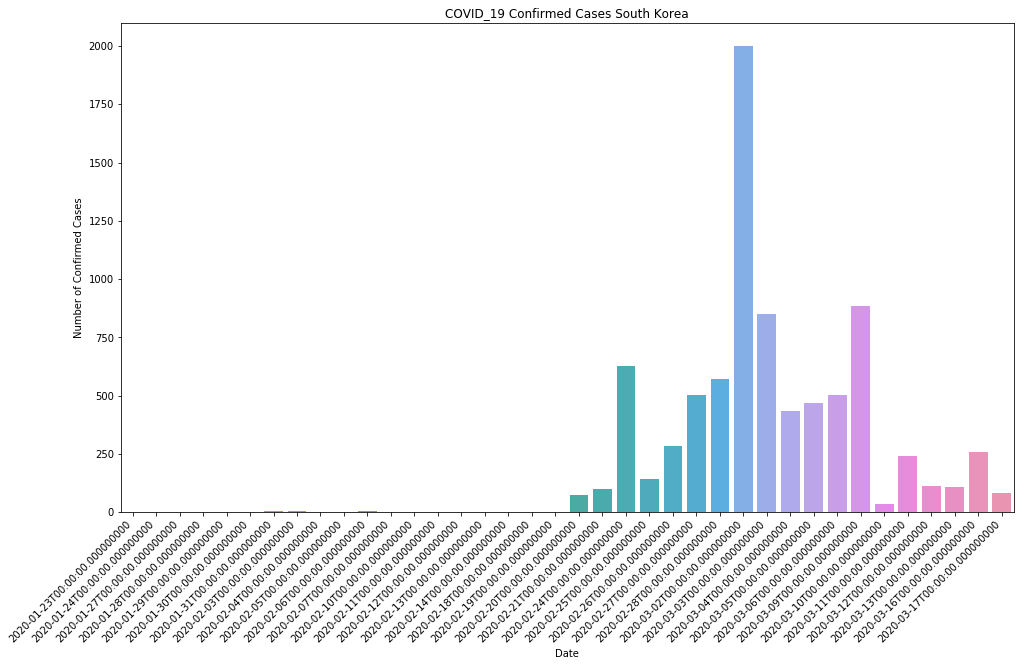

In [39]:
ax = sns.barplot(x=(COVID_19_C_diff['index'].dt.round('h')), y=COVID_19_C_diff['Korea, South'], data=COVID_19_C_diff)
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases')
plt.title('COVID_19 Confirmed Cases South Korea')

In [40]:
print (COVID_19_C_diff['Korea, South'].mean(axis = 0))
print (COVID_19_C_diff['Korea, South'].std(axis = 0))

218.92105263157896
388.76445877892803


In [41]:
print (COVID_19_C_diff['China'].mean(axis = 0))
print (COVID_19_C_diff['China'].std(axis = 0))

2118.684210526316
3323.0570759489256


Text(0.5, 1.0, 'COVID_19 Confirmed Cases China')

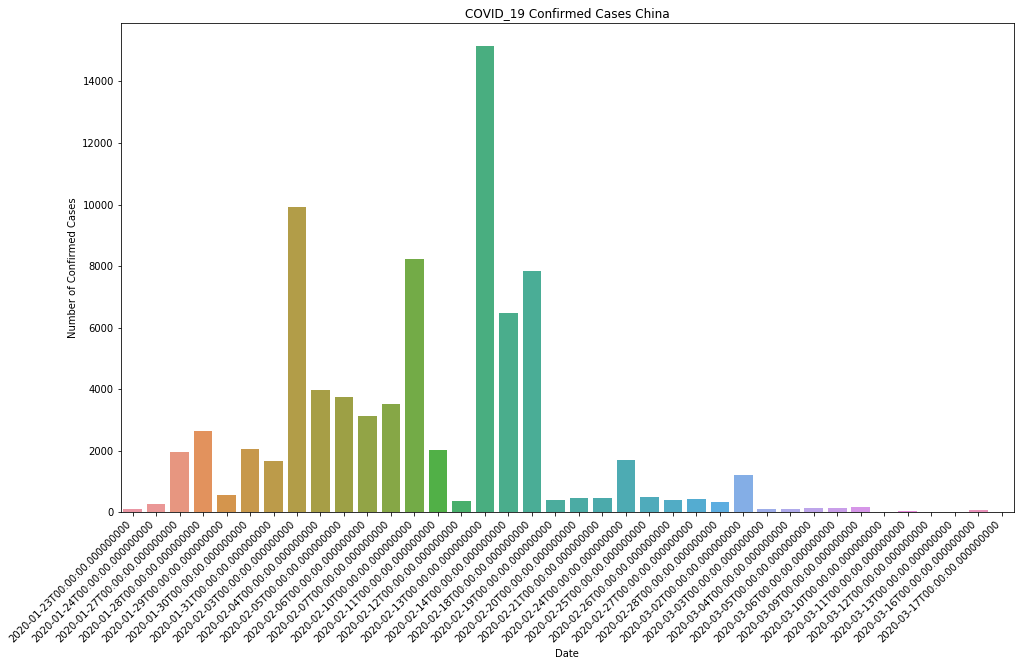

In [42]:
ax = sns.barplot(x=(COVID_19_C_diff['index'].dt.round('h')), y=COVID_19_C_diff['China'], data=COVID_19_C_diff)
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases')
plt.title('COVID_19 Confirmed Cases China')

Text(0.5, 1.0, 'COVID_19 Confirmed Cases Canada')

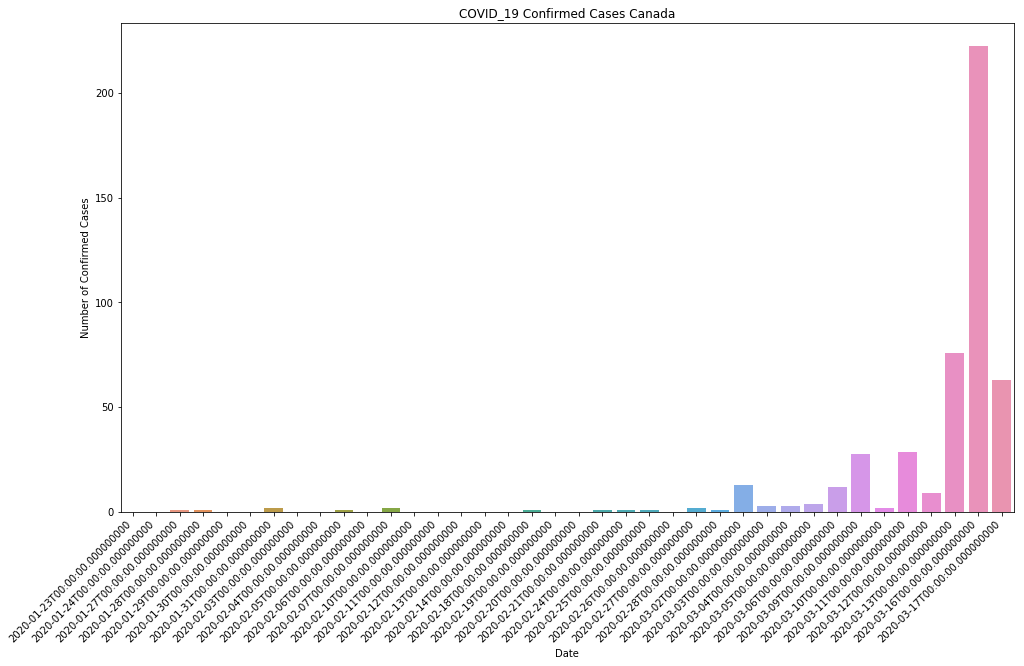

In [43]:
ax = sns.barplot(x=(COVID_19_C_diff['index'].dt.round('h')), y=COVID_19_C_diff['Canada'], data=COVID_19_C_diff)
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases')
plt.title('COVID_19 Confirmed Cases Canada')

Text(0.5, 1.0, 'COVID_19 Confirmed Cases US')

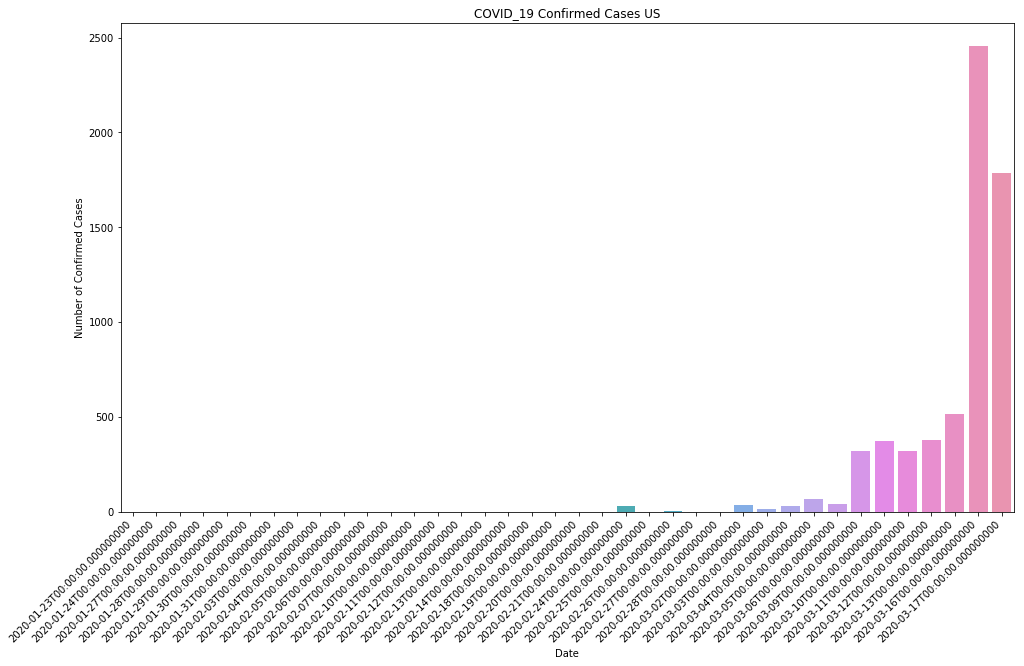

In [44]:
ax = sns.barplot(x=(COVID_19_C_diff['index'].dt.round('h')), y=COVID_19_C_diff['US'], data=COVID_19_C_diff)
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases')
plt.title('COVID_19 Confirmed Cases US')

In [46]:
COVID_19_C_2.Canada.diff()

index
2020-01-22    NaN
2020-01-23      0
2020-01-24      0
2020-01-27      1
2020-01-28      1
2020-01-29      0
2020-01-30      0
2020-01-31      2
2020-02-03      0
2020-02-04      0
2020-02-05      1
2020-02-06      0
2020-02-07      2
2020-02-10      0
2020-02-11      0
2020-02-12      0
2020-02-13      0
2020-02-14      0
2020-02-18      1
2020-02-19      0
2020-02-20      0
2020-02-21      1
2020-02-24      1
2020-02-25      1
2020-02-26      0
2020-02-27      2
2020-02-28      1
2020-03-02     13
2020-03-03      3
2020-03-04      3
2020-03-05      4
2020-03-06     12
2020-03-09     28
2020-03-10      2
2020-03-11     29
2020-03-12      9
2020-03-13     76
2020-03-16    222
2020-03-17     63
Name: Canada, dtype: object

### Correlation Matricies

In [169]:
Correlation_COVID_19_C_3 = pd.concat([COVID_19_C_2,dfP], axis=1)
Correlation_COVID_19_D_3 = pd.concat([COVID_19_D_2,dfP], axis=1)
Correlation_COVID_19_R_3 = pd.concat([COVID_19_R_2,dfP], axis=1)

In [170]:
Correlation_COVID_19_C_3 = Correlation_COVID_19_C_3.astype(float)

Correlation_COVID_19_D_3 = Correlation_COVID_19_D_3.astype(float)

Correlation_COVID_19_R_3 = Correlation_COVID_19_R_3.astype(float)

In [171]:
corelation_matrix_C = Correlation_COVID_19_C_3.corr()
corelation_matrix_D = Correlation_COVID_19_D_3.corr()
corelation_matrix_R = Correlation_COVID_19_R_3.corr()

In [172]:
corelation_matrix_C.to_csv ('correlation_matrix_confirmed_cases.csv', index = False, header=True)
corelation_matrix_D.to_csv ('correlation_matrix_death_cases.csv', index = False, header=True)
corelation_matrix_R.to_csv ('correlation_matrix_recovery_cases.csv', index = False, header=True)

In [174]:
COVID_19_C_2.to_csv ('total_cumulative_confirmed.csv', index = False, header=True)
COVID_19_D_2.to_csv ('total_cumulative_death.csv', index = False, header=True)
COVID_19_R_2.to_csv ('total_cumulative_recovered.csv', index = False, header=True)

Lets play around with top 10 values in different dataframes

In [175]:
corelation_matrix_C.head()

Afghanistan   Albania   Algeria   Andorra  \
Afghanistan             1.000000  0.946215  0.941665  0.776781   
Albania                 0.946215  1.000000  0.892652  0.694536   
Algeria                 0.941665  0.892652  1.000000  0.901810   
Andorra                 0.776781  0.694536  0.901810  1.000000   
Antigua and Barbuda     0.774217  0.883986  0.723357  0.538469   

                     Antigua and Barbuda  Argentina   Armenia     Aruba  \
Afghanistan                     0.774217   0.977925  0.902163  0.774217   
Albania                         0.883986   0.975561  0.852497  0.883986   
Algeria                         0.723357   0.942775  0.791659  0.723357   
Andorra                         0.538469   0.760893  0.614961  0.538469   
Antigua and Barbuda             1.000000   0.842831  0.792435  1.000000   

                     Australia   Austria  ...       XRT       RXI       IYW  \
Afghanistan           0.979945  0.979598  ... -0.859079 -0.858527 -0.815398   
Albania               0.957743  0.982590  ... -0.831988 -0.817833 -0.747880   
Algeria               0.969541  0.930873  ... -0.920051 -0.913570 -0.868526   
Andorra               0.828166  0.749241  ... -0.867887 -0.861630 -0.819669   
Antigua and Barbuda   0.834674  0.875105  ... -0.625401 -0.619704 -0.527039   

                          VIS       KBE       SIL      FNCL       XAR  \
Afghanistan         -0.833971 -0.799697 -0.801400 -0.814156 -0.835310   
Albania             -0.786413 -0.736322 -0.863698 -0.754434 -0.790848   
Algeria             -0.903954 -0.898034 -0.848112 -0.901067 -0.904837   
Andorra             -0.866848 -0.877922 -0.761123 -0.871620 -0.867137   
Antigua and Barbuda -0.575721 -0.515727 -0.747829 -0.529587 -0.587661   

                          FXU       SHY  
Afghanistan         -0.847763  0.664545  
Albania             -0.838270  0.572895  
Algeria             -0.859385  0.826214  
Andorra             -0.755810  0.896674  
Antigua and Barbuda -0.633890  0.417608  

[5 rows x 179 columns]

### Looking for Patterns

FNCL = Financial Sector ETF

XRT = Retail ETF

VNQ = Real Estate ETF

GDX = Gold ETF

KBE = Bank ETF

XLF = Financial Sector

VIS = Indusrials

XAR = Aerospace

XLE = Energy

IHI = Medical Devices

DIA = Dow Jones Industrial Average

RXI = Global Consumer Discretionary

SIL = Silver

In [176]:
#Lets look at Austria
#correlation_matrix_C_Austria['Austria'] = corelation_matrix_C['Austria']

for x in corelation_matrix_C.columns:
    correlation_matrix_C_Austria = pd.DataFrame(data=corelation_matrix_C[x], index=corelation_matrix_C.index)
    print (correlation_matrix_C_Austria.nsmallest(10, x))


#correlation_matrix_C_Austria = pd.DataFrame(data=corelation_matrix_C['China'], index=corelation_matrix_C.index)
#print (correlation_matrix_C_Austria.nsmallest(10, 'China'))

#correlation_matrix_C_Austria = pd.DataFrame(data=corelation_matrix_C['Italy'], index=corelation_matrix_C.index)
#print (correlation_matrix_C_Austria.nsmallest(10, 'Italy'))

#correlation_matrix_C_Austria = pd.DataFrame(data=corelation_matrix_C['Canada'], index=corelation_matrix_C.index)
#print (correlation_matrix_C_Austria.nsmallest(10, 'Canada'))

     Afghanistan
VNQ    -0.898303
XLU    -0.885141
XRT    -0.859079
RXI    -0.858527
FXU    -0.847763
XLY    -0.847761
XAR    -0.835310
VIS    -0.833971
DIA    -0.831688
IHI    -0.827052
       Albania
XLU  -0.878857
VNQ  -0.865678
SIL  -0.863698
GDX  -0.840394
FXU  -0.838270
XRT  -0.831988
RXI  -0.817833
XLY  -0.804285
FSTA -0.795198
XAR  -0.790848
       Algeria
XRT  -0.920051
RXI  -0.913570
VNQ  -0.908861
XAR  -0.904837
VIS  -0.903954
XLY  -0.902364
FNCL -0.901067
XLF  -0.899250
KBE  -0.898034
XLE  -0.892895
       Andorra
KBE  -0.877922
FNCL -0.871620
XLF  -0.871488
XRT  -0.867887
XAR  -0.867137
VIS  -0.866848
RXI  -0.861630
XLE  -0.861178
IHI  -0.850647
XLY  -0.847817
     Antigua and Barbuda
SIL            -0.747829
GDX            -0.747719
XLU            -0.675768
VNQ            -0.647472
FXU            -0.633890
XRT            -0.625401
RXI            -0.619704
XLY            -0.605915
XAR            -0.587661
VIS            -0.575721
     Argentina
VNQ  -0.889449
XLU  -0.87954

        Israel
VNQ  -0.925410
XRT  -0.914761
XLU  -0.913739
RXI  -0.901778
SIL  -0.900173
XAR  -0.889002
FXU  -0.888816
XLY  -0.888148
VIS  -0.886749
FNCL -0.870866
         Italy
VNQ  -0.925941
XRT  -0.925094
RXI  -0.915381
XAR  -0.906566
XLU  -0.905407
VIS  -0.904467
XLY  -0.901604
SIL  -0.898577
FNCL -0.892382
XLE  -0.891919
       Jamaica
SIL  -0.805272
GDX  -0.799404
XLU  -0.777095
VNQ  -0.752724
FXU  -0.732110
XRT  -0.720153
RXI  -0.711517
XLY  -0.698763
FSTA -0.678174
XAR  -0.676846
         Japan
XLE  -0.980385
KBE  -0.977769
XAR  -0.968924
FNCL -0.968162
XLF  -0.967381
VIS  -0.966579
RXI  -0.957600
XRT  -0.956115
DIA  -0.950084
IHI  -0.949934
        Jersey
VNQ  -0.609809
XLU  -0.595722
FXU  -0.555078
XLY  -0.527132
RXI  -0.525823
XRT  -0.515215
XLV  -0.515178
IHI  -0.498841
FSTA -0.493386
DIA  -0.492526
       Jordan
VNQ -0.691455
XLU -0.668683
FXU -0.634520
RXI -0.626547
XLY -0.625834
XRT -0.618850
XLV -0.600864
IHI -0.599301
DIA -0.593766
IYW -0.588386
     Kazakhstan
XLU  

      Seychelles
VNQ    -0.609809
XLU    -0.595722
FXU    -0.555078
XLY    -0.527132
RXI    -0.525823
XRT    -0.515215
XLV    -0.515178
IHI    -0.498841
FSTA   -0.493386
DIA    -0.492526
      Singapore
XLE   -0.919034
KBE   -0.897262
IHI   -0.885720
XAR   -0.884670
VIS   -0.882237
RXI   -0.878649
XLF   -0.878333
FNCL  -0.877567
XRT   -0.874576
DIA   -0.873373
      Slovakia
XLU  -0.832669
VNQ  -0.826024
SIL  -0.800617
FXU  -0.791081
XRT  -0.777742
RXI  -0.770812
GDX  -0.766393
XLY  -0.760394
XAR  -0.737186
FSTA -0.736893
      Slovenia
XLU  -0.865401
VNQ  -0.858286
SIL  -0.838330
FXU  -0.825362
XRT  -0.817333
RXI  -0.807110
GDX  -0.805970
XLY  -0.795762
FSTA -0.778257
XAR  -0.776836
       Somalia
VNQ  -0.609809
XLU  -0.595722
FXU  -0.555078
XLY  -0.527132
RXI  -0.525823
XRT  -0.515215
XLV  -0.515178
IHI  -0.498841
FSTA -0.493386
DIA  -0.492526
      South Africa
VNQ      -0.839782
XLU      -0.839340
FXU      -0.798781
XRT      -0.785204
RXI      -0.778512
SIL      -0.778341
XLY      